In [1]:
import sys
import os
import glob as gb
sys.path.append('/home/cbenitez/')
import MTmp as mt
import matplotlib.pyplot as plt
import numpy as np
import oort_cons as oc

amrviewer GUI ImportError : are WxPython and PyTables correctly installed?


In [2]:
def bin_spread(MCMCrun,ivc):
    nsamples,flattened_chain = MCMCrun.Nwalkers*10, MCMCrun.sampler.get_chain(flat=True,discard=MCMCrun.burn_in)
    models = []
    draw = np.floor(np.random.uniform(0,len(flattened_chain),size=nsamples)).astype(int)
    thetas = flattened_chain[draw]
    fch = [oc.vr_model_ext,oc.vell_model_ext,oc.vb_model_ext][ivc]
    ll = np.linspace(-np.pi,np.pi,200)
    bb = np.linspace(MCMCrun.cc_galac[:,2].min(),MCMCrun.cc_galac[:,2].max(),10)
    for b in bb:
        mod = np.array([fch(c,MCMCrun.theta) for c in [[1.,l,b] for l in ll]])
        models.append(mod)
    spread_up = np.max(models,axis=0)
    spread_down = np.min(models,axis=0)
    med_model = np.median(models,axis=0)
    return med_model,spread_down,spread_up

In [3]:
def theta_spread(MCMCrun,ivc):
    nsamples,flattened_chain = MCMCrun.Nwalkers*5, MCMCrun.sampler.get_chain(flat=True,discard=MCMCrun.burn_in)
    models = []
    draw = np.floor(np.random.uniform(0,len(flattened_chain),size=nsamples)).astype(int)
    thetas = flattened_chain[draw]
    fch = [oc.vr_model_ext,oc.vell_model_ext,oc.vb_model_ext][ivc]
    for i in thetas:
        mod = np.array([fch(c,i)/c[0] for c in MCMCrun.cc_galac[MCMCrun.cc_galac[:,1].argsort()]])
        models.append(mod)
    spread = np.std(models,axis=0)
    med_model = np.median(models,axis=0)
    return med_model,spread

In [4]:
def theta_spread(MCMCrun,ivc):
    nsamples,flattened_chain = MCMCrun.Nwalkers*20, MCMCrun.sampler.get_chain(flat=True,discard=MCMCrun.Nsteps-MCMCrun.Nwalkers*10)
    models = []
    draw = np.floor(np.random.uniform(0,len(flattened_chain),size=nsamples)).astype(int)
    thetas = flattened_chain[draw]
    fch = [oc.vr_model_ext,oc.vell_model_ext,oc.vb_model_ext][ivc]
    for i in thetas:
        aux = np.copy(MCMCrun.cc_galac)
        bsorted = aux[MCMCrun.cc_galac[:,2].argsort()]
        lsorted = bsorted[bsorted[:,1].argsort()]
        mod = np.array([fch(c,i)/c[0] for c in lsorted])
        models.append(mod)
    spread = np.std(models,axis=0)
    med_model = np.median(models,axis=0)
    return lsorted,med_model,spread

In [5]:
def phase_space_binprev(xxvvdd,cc_galac,vv_galac,dd,cc,vv,xvLSR,binned_ids,colors,all_ids):
    fig, axs = plt.subplots(3, 2, sharex=False,figsize=(12,12))

    for bin_ids,bin_color in zip(binned_ids,colors):
         
        auxbola = [idc in bin_ids for idc in all_ids]
        cc_galac_bin = cc_galac[auxbola]
        vv_galac_bin = vv_galac[auxbola]
        dd_bin = dd[auxbola]
        cc_bin = cc[auxbola]
        vv_bin = vv[auxbola]

        axs[0,0].scatter(cc_galac_bin[:,1],vv_galac_bin[:,0]/cc_galac_bin[:,0],s=map(int,np.log(dd_bin)*10),c=bin_color,alpha=.5)
        axs[1,0].scatter(cc_galac_bin[:,1],vv_galac_bin[:,1]/cc_galac_bin[:,0],s=map(int,np.log(dd_bin)*10),c=bin_color,alpha=.5)
        axs[2,0].scatter(cc_galac_bin[:,1],vv_galac_bin[:,2]/cc_galac_bin[:,0],s=map(int,np.log(dd_bin)*10),c=bin_color,alpha=.5)

        axs[0,1].scatter(cc_bin[:,0],cc_bin[:,1],s=map(int,np.log(dd_bin)*20),c=bin_color,alpha=.5)
        axs[1,1].scatter(cc_bin[:,0],cc_bin[:,2],s=map(int,np.log(dd_bin)*20),c=bin_color,alpha=.5)
        axs[2,1].scatter(cc_bin[:,1],cc_bin[:,2],s=map(int,np.log(dd_bin)*20),c=bin_color,alpha=.5)

        #axs[0,1].quiver(cc_bin[:,0],cc_bin[:,1],(vv_bin[:,0]-xvLSR[3])*velscale,(vv_bin[:,1]-xvLSR[4])*velscale,angles='xy', units='width', scale=quivscale,color="k",alpha=.3)
        #axs[1,1].quiver(cc_bin[:,0],cc_bin[:,2],(vv_bin[:,0]-xvLSR[3])*velscale,(vv_bin[:,2]-xvLSR[5])*velscale,angles='xy', units='width', scale=quivscale,color="k",alpha=.3)
        #axs[2,1].quiver(cc_bin[:,1],cc_bin[:,2],(vv_bin[:,1]-xvLSR[4])*velscale,(vv_bin[:,2]-xvLSR[5])*velscale,angles='xy', units='width', scale=quivscale,color="k",alpha=.3)
    #axs[0,1].quiver(cc[:,0],cc[:,1],(vv[:,0])*velscale,(vv[:,1])*velscale,angles='xy', units='width', scale=quivscale,color="k",alpha=.3)
    #axs[1,1].quiver(cc[:,0],cc[:,2],(vv[:,0])*velscale,(vv[:,2])*velscale,angles='xy', units='width', scale=quivscale,color="k",alpha=.3)
    #axs[2,1].quiver(cc[:,1],cc[:,2],(vv[:,1])*velscale,(vv[:,2])*velscale,angles='xy', units='width', scale=quivscale,color="k",alpha=.3)

    #axs[0,1].quiver([xvLSR[0]],[xvLSR[1]],[xvLSR[3]*velscale],[xvLSR[4]*velscale],angles='xy', units='width', scale=quivscale,color="r",alpha=.5)
    #axs[1,1].quiver([xvLSR[0]],[xvLSR[2]],[xvLSR[3]*velscale],[xvLSR[5]*velscale],angles='xy', units='width', scale=quivscale,color="r",alpha=.5)
    #axs[2,1].quiver([xvLSR[1]],[xvLSR[2]],[xvLSR[4]*velscale],[xvLSR[5]*velscale],angles='xy', units='width', scale=quivscale,color="r",alpha=.5)
    axs[0,1].scatter([xvLSR[0]],[xvLSR[1]],color="r",alpha=1,s=30,marker="X")
    axs[1,1].scatter([xvLSR[0]],[xvLSR[2]],color="r",alpha=1,s=30,marker="X")
    axs[2,1].scatter([xvLSR[1]],[xvLSR[2]],color="r",alpha=1,s=30,marker="X")

    axs[0,0].locator_params(nbins=7)
    axs[1,0].locator_params(nbins=7)
    axs[2,0].locator_params(nbins=7)

    axs[0,0].set_ylabel(r'$v_r$',fontsize=24)
    axs[1,0].set_ylabel(r'$v_{\ell}$',fontsize=24)
    axs[2,0].set_ylabel(r'$v_{b}$',fontsize=24)
    axs[0,0].set_xlabel(r'$\ell$  [deg]',fontsize=24)
    axs[1,0].set_xlabel(r'$\ell$  [deg]',fontsize=24)
    axs[2,0].set_xlabel(r'$\ell$  [deg]',fontsize=24)

    axs[0,1].set_ylabel(r'$Y$ [kpc]',fontsize=24)
    axs[1,1].set_ylabel(r'$Z$ [kpc]',fontsize=24)
    axs[2,1].set_ylabel(r'$Z$ [kpc]',fontsize=24)
    axs[0,1].set_xlabel(r'$X$ [kpc]',fontsize=24)
    axs[1,1].set_xlabel(r'$X$ [kpc]',fontsize=24)
    axs[2,1].set_xlabel(r'$Y$ [kpc]',fontsize=24)

    axs[0,0].set_xticks([l for l in np.linspace(np.pi,-np.pi,9)])
    axs[0,0].set_xticklabels(labels=[str(int(l*180/np.pi)) for l in np.linspace(np.pi,-np.pi,9)])
    axs[1,0].set_xticks([l for l in np.linspace(np.pi,-np.pi,9)])
    axs[1,0].set_xticklabels(labels=[str(int(l*180/np.pi)) for l in np.linspace(np.pi,-np.pi,9)])
    axs[2,0].set_xticks([l for l in np.linspace(np.pi,-np.pi,9)])
    axs[2,0].set_xticklabels(labels=[str(int(l*180/np.pi)) for l in np.linspace(np.pi,-np.pi,9)])

    for ax in axs.flatten():
        #ax.legend(loc="best")
        ax.xaxis.set_tick_params(labelsize=16)
        ax.yaxis.set_tick_params(labelsize=16)

    axs[0,1].axis('equal')
    axs[1,1].axis('equal')
    axs[2,1].axis('equal')
    
    xlim_auto0 = axs[0,1].get_xlim()
    xlim_auto1 = axs[1,1].get_xlim()
    xlim_auto2 = axs[2,1].get_xlim()
    ylim_auto0 = axs[0,1].get_ylim()
    ylim_auto1 = axs[1,1].get_ylim()
    ylim_auto2 = axs[2,1].get_ylim()
    
    axs[0,1].plot([xvLSR[0],0],[xvLSR[1],0],color="k",linestyle="--",alpha=1)

    axs[0,1].set_xlim(xlim_auto0[0],xlim_auto0[1])
    axs[1,1].set_xlim(xlim_auto1[0],xlim_auto1[1])
    axs[2,1].set_xlim(xlim_auto2[0],xlim_auto2[1])
    axs[0,1].set_ylim(ylim_auto0[0],ylim_auto0[1])
    axs[1,1].set_ylim(ylim_auto1[0],ylim_auto1[1])
    axs[2,1].set_ylim(ylim_auto2[0],ylim_auto2[1])

    plt.tight_layout()

In [6]:
def plot_fit(fitObj,figax=None):
    ll = np.linspace(-np.pi,np.pi,500)

    #fig.subplots_adjust(hspace=0)

    theta_f = np.array(fitObj.theta)
    theta_fp = theta_f + np.array(fitObj.std)
    theta_fm = theta_f - np.array(fitObj.std)
    cc_galac,vv_galac, dd = fitObj.cc_galac, fitObj.vv_galac, fitObj.dd

    if figax==None:
        fig, axs = plt.subplots(3, 1, sharex=False,figsize=(8,12))
    else:
        fig, axs = figax

    #axs[0].plot(cc_galac[:,1],[vr_model_ext(c,theta_f) for c in cc_galac],ls='--',lw=1,c="k",alpha=.8)
    axs[0].scatter(cc_galac[:,1],[oc.vr_model_ext(c,theta_f)/c[0] for c in cc_galac],s=map(int,dd*10),c='blue',alpha=.4,label="data")
    axs[0].scatter(cc_galac[:,1],vv_galac[:,0]/cc_galac[:,0],s=5,c='red',alpha=1,label="fitted")
    plt.yticks(fontsize=22)

    #axs[1].plot(cc_galac[:,1],[vell_model_ext(c,theta_f) for c in cc_galac],ls='--',lw=1,c="k",alpha=.8)
    axs[1].scatter(cc_galac[:,1],[oc.vell_model_ext(c,theta_f)/c[0] for c in cc_galac],s=map(int,dd*10),c='blue',alpha=.4,label="data")
    axs[1].scatter(cc_galac[:,1],vv_galac[:,1]/cc_galac[:,0],s=5,c='red',alpha=1,label="fitted")

    plt.yticks(fontsize=22)

    #axs[2].plot(cc_galac[:,1],[vb_model_ext(c,theta_f) for c in cc_galac],ls='--',lw=1,c="k",alpha=.8)
    axs[2].scatter(cc_galac[:,1],[oc.vb_model_ext(c,theta_f)/c[0] for c in cc_galac],s=map(int,dd*10),c='blue',alpha=.4,label="data")
    axs[2].scatter(cc_galac[:,1],vv_galac[:,2]/cc_galac[:,0],s=5,c='red',alpha=1,label="fitted",marker="+")

    plt.yticks(fontsize=22)

    #axs[2].plot(ll,[vb_model(c,theta_f) for c in [np.array([1.,l,.0]) for l in ll]])
    #axs[2].scatter([c[1] for c in cc_galac],[vv_galac[i][2]/cc_galac[i][0]/np.sin(cc_galac[i][2])/np.cos(cc_galac[i][2]) for i in range(len(vv_galac))],s=4)


    #axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
    #axs[0].set_ylim(-1, 1)

    axs[0].locator_params(nbins=7)
    axs[1].locator_params(nbins=7)
    axs[2].locator_params(nbins=7)
    axs[0].set_ylabel(r'$v_r$',fontsize=24)
    axs[1].set_ylabel(r'$v_{\ell}$',fontsize=24)
    axs[2].set_ylabel(r'$v_{b}$',fontsize=24)
    axs[0].set_xlabel(r'$\ell$  [deg]',fontsize=24)
    axs[1].set_xlabel(r'$\ell$  [deg]',fontsize=24)
    axs[2].set_xlabel(r'$\ell$  [deg]',fontsize=24)

    #axs[0].invert_xaxis()
    #axs[1].invert_xaxis()
    #axs[2].set_ylabel(r'$\frac{v_{b}}{r\cos{b}\sin{b}}$',fontsize=28)

    axs[0].set_xticks([l for l in np.linspace(np.pi,-np.pi,9)])
    axs[0].set_xticklabels(labels=[str(int(l*180/np.pi)) for l in np.linspace(np.pi,-np.pi,9)])
    axs[1].set_xticks([l for l in np.linspace(np.pi,-np.pi,9)])
    axs[1].set_xticklabels(labels=[str(int(l*180/np.pi)) for l in np.linspace(np.pi,-np.pi,9)])
    axs[2].set_xticks([l for l in np.linspace(np.pi,-np.pi,9)])
    axs[2].set_xticklabels(labels=[str(int(l*180/np.pi)) for l in np.linspace(np.pi,-np.pi,9)])

    axs[0].xaxis.set_tick_params(labelsize=16)
    axs[1].xaxis.set_tick_params(labelsize=16)
    axs[0].yaxis.set_tick_params(labelsize=16)
    axs[1].yaxis.set_tick_params(labelsize=16)
    plt.tight_layout(w_pad=2.)

    return fig,axs

In [7]:
def phase_space_bin(xxvvdd,cc_galac,vv_galac,dd,cc,vv,xvLSR,bb_bins,tc):
    fig, axs = plt.subplots(3, 2, sharex=False,figsize=(12,12))
    for bbin in bb_bins:
        b_min,b_max,bin_color = bbin
        cc_galac_bin = cc_galac[(cc_galac[:,2]<b_max) & (cc_galac[:,2]>=b_min)]
        vv_galac_bin = vv_galac[(cc_galac[:,2]<b_max) & (cc_galac[:,2]>=b_min)]
        dd_bin = dd[(cc_galac[:,2]<b_max) & (cc_galac[:,2]>b_min)]
        cc_bin = cc[(cc_galac[:,2]<b_max) & (cc_galac[:,2]>=b_min)]
        vv_bin = vv[(cc_galac[:,2]<b_max) & (cc_galac[:,2]>=b_min)]

        axs[0,0].scatter(cc_galac_bin[:,1],vv_galac_bin[:,0]/cc_galac_bin[:,0],s=map(int,np.log(dd_bin)*10),c=bin_color,alpha=.5,label=r"$%g \leq b< %g$"%(b_min,b_max))
        axs[1,0].scatter(cc_galac_bin[:,1],vv_galac_bin[:,1]/cc_galac_bin[:,0],s=map(int,np.log(dd_bin)*10),c=bin_color,alpha=.5,label=r"$%g \leq b< %g$"%(b_min,b_max))
        axs[2,0].scatter(cc_galac_bin[:,1],vv_galac_bin[:,2]/cc_galac_bin[:,0],s=map(int,np.log(dd_bin)*10),c=bin_color,alpha=.5,label=r"$%g \leq b< %g$"%(b_min,b_max))

        axs[0,1].scatter(cc_bin[:,0],cc_bin[:,1],s=map(int,np.log(dd_bin)*20),c=bin_color,alpha=.5)
        axs[1,1].scatter(cc_bin[:,0],cc_bin[:,2],s=map(int,np.log(dd_bin)*20),c=bin_color,alpha=.5)
        axs[2,1].scatter(cc_bin[:,1],cc_bin[:,2],s=map(int,np.log(dd_bin)*20),c=bin_color,alpha=.5)

        #axs[0,1].quiver(cc_bin[:,0],cc_bin[:,1],(vv_bin[:,0]-xvLSR[3])*velscale,(vv_bin[:,1]-xvLSR[4])*velscale,angles='xy', units='width', scale=quivscale,color="k",alpha=.3)
        #axs[1,1].quiver(cc_bin[:,0],cc_bin[:,2],(vv_bin[:,0]-xvLSR[3])*velscale,(vv_bin[:,2]-xvLSR[5])*velscale,angles='xy', units='width', scale=quivscale,color="k",alpha=.3)
        #axs[2,1].quiver(cc_bin[:,1],cc_bin[:,2],(vv_bin[:,1]-xvLSR[4])*velscale,(vv_bin[:,2]-xvLSR[5])*velscale,angles='xy', units='width', scale=quivscale,color="k",alpha=.3)
    #axs[0,1].quiver(cc[:,0],cc[:,1],(vv[:,0])*velscale,(vv[:,1])*velscale,angles='xy', units='width', scale=quivscale,color="k",alpha=.3)
    #axs[1,1].quiver(cc[:,0],cc[:,2],(vv[:,0])*velscale,(vv[:,2])*velscale,angles='xy', units='width', scale=quivscale,color="k",alpha=.3)
    #axs[2,1].quiver(cc[:,1],cc[:,2],(vv[:,1])*velscale,(vv[:,2])*velscale,angles='xy', units='width', scale=quivscale,color="k",alpha=.3)

    #axs[0,1].quiver([xvLSR[0]],[xvLSR[1]],[xvLSR[3]*velscale],[xvLSR[4]*velscale],angles='xy', units='width', scale=quivscale,color="r",alpha=.5)
    #axs[1,1].quiver([xvLSR[0]],[xvLSR[2]],[xvLSR[3]*velscale],[xvLSR[5]*velscale],angles='xy', units='width', scale=quivscale,color="r",alpha=.5)
    #axs[2,1].quiver([xvLSR[1]],[xvLSR[2]],[xvLSR[4]*velscale],[xvLSR[5]*velscale],angles='xy', units='width', scale=quivscale,color="r",alpha=.5)
    axs[0,1].scatter([xvLSR[0]],[xvLSR[1]],color="r",alpha=1,s=30,marker="X")
    axs[1,1].scatter([xvLSR[0]],[xvLSR[2]],color="r",alpha=1,s=30,marker="X")
    axs[2,1].scatter([xvLSR[1]],[xvLSR[2]],color="r",alpha=1,s=30,marker="X")

    axs[0,0].locator_params(nbins=7)
    axs[1,0].locator_params(nbins=7)
    axs[2,0].locator_params(nbins=7)

    axs[0,0].set_ylabel(r'$v_r$',fontsize=24)
    axs[1,0].set_ylabel(r'$v_{\ell}$',fontsize=24)
    axs[2,0].set_ylabel(r'$v_{b}$',fontsize=24)
    axs[0,0].set_xlabel(r'$\ell$  [deg]',fontsize=24)
    axs[1,0].set_xlabel(r'$\ell$  [deg]',fontsize=24)
    axs[2,0].set_xlabel(r'$\ell$  [deg]',fontsize=24)

    axs[0,1].set_ylabel(r'$Y$ [kpc]',fontsize=24)
    axs[1,1].set_ylabel(r'$Z$ [kpc]',fontsize=24)
    axs[2,1].set_ylabel(r'$Z$ [kpc]',fontsize=24)
    axs[0,1].set_xlabel(r'$X$ [kpc]',fontsize=24)
    axs[1,1].set_xlabel(r'$X$ [kpc]',fontsize=24)
    axs[2,1].set_xlabel(r'$Y$ [kpc]',fontsize=24)

    axs[0,0].set_xticks([l for l in np.linspace(np.pi,-np.pi,9)])
    axs[0,0].set_xticklabels(labels=[str(int(l*180/np.pi)) for l in np.linspace(np.pi,-np.pi,9)])
    axs[1,0].set_xticks([l for l in np.linspace(np.pi,-np.pi,9)])
    axs[1,0].set_xticklabels(labels=[str(int(l*180/np.pi)) for l in np.linspace(np.pi,-np.pi,9)])
    axs[2,0].set_xticks([l for l in np.linspace(np.pi,-np.pi,9)])
    axs[2,0].set_xticklabels(labels=[str(int(l*180/np.pi)) for l in np.linspace(np.pi,-np.pi,9)])

    for ax in axs.flatten():
        ax.legend(loc="best")
        ax.xaxis.set_tick_params(labelsize=16)
        ax.yaxis.set_tick_params(labelsize=16)

    axs[0,1].axis('equal')
    axs[1,1].axis('equal')
    axs[2,1].axis('equal')
    
    xlim_auto0 = axs[0,1].get_xlim()
    xlim_auto1 = axs[1,1].get_xlim()
    xlim_auto2 = axs[2,1].get_xlim()
    ylim_auto0 = axs[0,1].get_ylim()
    ylim_auto1 = axs[1,1].get_ylim()
    ylim_auto2 = axs[2,1].get_ylim()
    
    axs[0,1].plot([xvLSR[0],0],[xvLSR[1],0],color="k",linestyle="--",alpha=1)

    axs[0,1].set_xlim(xlim_auto0[0],xlim_auto0[1])
    axs[1,1].set_xlim(xlim_auto1[0],xlim_auto1[1])
    axs[2,1].set_xlim(xlim_auto2[0],xlim_auto2[1])
    axs[0,1].set_ylim(ylim_auto0[0],ylim_auto0[1])
    axs[1,1].set_ylim(ylim_auto1[0],ylim_auto1[1])
    axs[2,1].set_ylim(ylim_auto2[0],ylim_auto2[1])

    plt.tight_layout()

In [8]:
def phase_space(xxvvdds,ccc_galac,vvv_galac,xvLSRs,ic,quivscale=2000,velscale=mt.C.kpc.express(mt.C.km)):

    xxvvdd = xxvvdds[ic]
    cc_galac,vv_galac = ccc_galac[ic],vvv_galac[ic]
    dd = xxvvdd[:,-1]
    cc = np.array([xv[:3:] for xv in xxvvdd])
    vv = np.array([xv[3:6] for xv in xxvvdd])
    xvLSR = xvLSRs[ic]
    fig, axs = plt.subplots(3, 2, sharex=False,figsize=(12,12))


    axs[0,0].scatter(cc_galac[:,1],vv_galac[:,0]/cc_galac[:,0],s=map(int,dd*10),c='blue',alpha=.5,label="data")
    axs[1,0].scatter(cc_galac[:,1],vv_galac[:,1]/cc_galac[:,0],s=map(int,dd*10),c='blue',alpha=.5,label="data")
    axs[2,0].scatter(cc_galac[:,1],vv_galac[:,2]/cc_galac[:,0],s=map(int,dd*10),c='blue',alpha=.5,label="data")

    axs[0,1].scatter(cc[:,0],cc[:,1],s=map(int,dd*10),c='blue',alpha=.3,label="data")
    axs[1,1].scatter(cc[:,0],cc[:,2],s=map(int,dd*10),c='blue',alpha=.3,label="data")
    axs[2,1].scatter(cc[:,1],cc[:,2],s=map(int,dd*10),c='blue',alpha=.3,label="data")    
    
    axs[0,1].quiver(cc[:,0],cc[:,1],(vv[:,0]-xvLSR[3])*velscale,(vv[:,1]-xvLSR[4])*velscale,angles='xy', units='width', scale=quivscale,color="k",alpha=.3)
    axs[1,1].quiver(cc[:,0],cc[:,2],(vv[:,0]-xvLSR[3])*velscale,(vv[:,2]-xvLSR[5])*velscale,angles='xy', units='width', scale=quivscale,color="k",alpha=.3)
    axs[2,1].quiver(cc[:,1],cc[:,2],(vv[:,1]-xvLSR[4])*velscale,(vv[:,2]-xvLSR[5])*velscale,angles='xy', units='width', scale=quivscale,color="k",alpha=.3)
    #axs[0,1].quiver(cc[:,0],cc[:,1],(vv[:,0])*velscale,(vv[:,1])*velscale,angles='xy', units='width', scale=quivscale,color="k",alpha=.3)
    #axs[1,1].quiver(cc[:,0],cc[:,2],(vv[:,0])*velscale,(vv[:,2])*velscale,angles='xy', units='width', scale=quivscale,color="k",alpha=.3)
    #axs[2,1].quiver(cc[:,1],cc[:,2],(vv[:,1])*velscale,(vv[:,2])*velscale,angles='xy', units='width', scale=quivscale,color="k",alpha=.3)
    
    axs[0,1].quiver([xvLSR[0]],[xvLSR[1]],[xvLSR[3]*velscale],[xvLSR[4]*velscale],angles='xy', units='width', scale=quivscale,color="r",alpha=1)
    axs[1,1].quiver([xvLSR[0]],[xvLSR[2]],[xvLSR[3]*velscale],[xvLSR[5]*velscale],angles='xy', units='width', scale=quivscale,color="r",alpha=1)
    axs[2,1].quiver([xvLSR[1]],[xvLSR[2]],[xvLSR[4]*velscale],[xvLSR[5]*velscale],angles='xy', units='width', scale=quivscale,color="r",alpha=1)
    axs[0,1].scatter([xvLSR[0]],[xvLSR[1]],color="r",alpha=1,s=30,marker="X")
    axs[1,1].scatter([xvLSR[0]],[xvLSR[2]],color="r",alpha=1,s=30,marker="X")
    axs[2,1].scatter([xvLSR[1]],[xvLSR[2]],color="r",alpha=1,s=30,marker="X")
    axs[0,1].plot([xvLSR[0],0],[xvLSR[1],0],color="k",linestyle="--",alpha=1)
    axs[1,1].plot([xvLSR[0],0],[xvLSR[2],0],color="k",linestyle="--",alpha=1)
    axs[2,1].plot([xvLSR[1],0],[xvLSR[2],0],color="k",linestyle="--",alpha=1)



    axs[0,0].locator_params(nbins=7)
    axs[1,0].locator_params(nbins=7)
    axs[2,0].locator_params(nbins=7)
    axs[0,0].set_ylabel(r'$v_r$',fontsize=24)
    axs[1,0].set_ylabel(r'$v_{\ell}$',fontsize=24)
    axs[2,0].set_ylabel(r'$v_{b}$',fontsize=24)
    axs[0,0].set_xlabel(r'$\ell$  [deg]',fontsize=24)
    axs[1,0].set_xlabel(r'$\ell$  [deg]',fontsize=24)
    axs[2,0].set_xlabel(r'$\ell$  [deg]',fontsize=24)

    axs[0,1].set_ylabel(r'$Y$ [kpc]',fontsize=24)
    axs[1,1].set_ylabel(r'$Z$ [kpc]',fontsize=24)
    axs[2,1].set_ylabel(r'$Z$ [kpc]',fontsize=24)
    axs[0,1].set_xlabel(r'$X$ [kpc]',fontsize=24)
    axs[1,1].set_xlabel(r'$X$ [kpc]',fontsize=24)
    axs[2,1].set_xlabel(r'$Y$ [kpc]',fontsize=24)

    axs[0,0].set_xticks([l for l in np.linspace(np.pi,-np.pi,9)])
    axs[0,0].set_xticklabels(labels=[str(int(l*180/np.pi)) for l in np.linspace(np.pi,-np.pi,9)])
    axs[1,0].set_xticks([l for l in np.linspace(np.pi,-np.pi,9)])
    axs[1,0].set_xticklabels(labels=[str(int(l*180/np.pi)) for l in np.linspace(np.pi,-np.pi,9)])
    axs[2,0].set_xticks([l for l in np.linspace(np.pi,-np.pi,9)])
    axs[2,0].set_xticklabels(labels=[str(int(l*180/np.pi)) for l in np.linspace(np.pi,-np.pi,9)])

    axs[0,0].xaxis.set_tick_params(labelsize=16)
    axs[1,0].xaxis.set_tick_params(labelsize=16)
    axs[2,0].xaxis.set_tick_params(labelsize=16)
    axs[0,0].yaxis.set_tick_params(labelsize=16)
    axs[1,0].yaxis.set_tick_params(labelsize=16)
    axs[2,0].yaxis.set_tick_params(labelsize=16)

    axs[0,1].xaxis.set_tick_params(labelsize=16)
    axs[1,1].xaxis.set_tick_params(labelsize=16)
    axs[2,1].xaxis.set_tick_params(labelsize=16)
    axs[0,1].yaxis.set_tick_params(labelsize=16)
    axs[1,1].yaxis.set_tick_params(labelsize=16)
    axs[2,1].yaxis.set_tick_params(labelsize=16)

    axs[0,1].axis('equal')
    axs[1,1].axis('equal')
    axs[2,1].axis('equal')

    axs[0,1].set_xlim(xvLSR[0]-1.,xvLSR[0]+1.)
    axs[1,1].set_xlim(xvLSR[0]-1.,xvLSR[0]+1.)
    axs[2,1].set_xlim(xvLSR[1]-1.,xvLSR[1]+1.)
    axs[0,1].set_ylim(xvLSR[1]-1.,xvLSR[1]+1.)
    axs[1,1].set_ylim(xvLSR[2]-1.,xvLSR[2]+1.)
    axs[2,1].set_ylim(xvLSR[2]-1.,xvLSR[2]+1.)
    
    #axs[0,1].set_xlim(xv_LSR[0]-1,xv_LSR[0]+1)
    #axs[0,1].set_ylim(xv_LSR[1]-1,xv_LSR[1]+1)
    #axs[1,1].set_xlim(xv_LSR[0]-1,xv_LSR[0]+1)
    #axs[1,1].set_ylim(xv_LSR[2]-1,xv_LSR[2]+1)
    #axs[2,1].set_xlim(xv_LSR[1]-1,xv_LSR[1]+1)
    #axs[2,1].set_ylim(xv_LSR[2]-1,xv_LSR[2]+1)

    plt.tight_layout(w_pad=2.)


____

In [9]:
tol=20

In [10]:
ls /fs/nas14/other0/cbenitez/partsSim

info_mp_marbles_14032021-122643
info_mp_marbles_15032021-003752
MCMCrun_mp_marbles_15032021-003752_newW.npy
MCMCrun_mp_marbles_15032021-003752_ringsW2.npy
MCMCrun_mp_marbles_15032021-003752_ringsW.npy
mp_marbles_14032021-122643
mp_marbles_14032021-122643LSR
mp_marbles_14032021-122643_script.py
mp_marbles_15032021-003752
mp_marbles_15032021-003752LSR
mp_marbles_15032021-003752_MCMCacumW.npy
mp_marbles_15032021-003752_script.py


In [11]:
DFparts,DFlsrs = mt.read_dat("/fs/nas14/other0/cbenitez/partsSim/",'mp_marbles_15032021-003752') 

In [12]:
DFparts.creation_time=DFparts.creation_time*mt.C.s.express(mt.C.Myr)
DFlsrs.creation_time=DFlsrs.creation_time*mt.C.s.express(mt.C.Myr)

In [13]:
np.unique(DFparts["output"])

array([11, 12, 13, 14, 15, 16])

In [14]:
tt = np.unique(DFparts.creation_time)
delta_tt = np.diff(tt)
xv_LSRs = [np.array([ 7.31874645e+00,  1.68672635e-01,  0.00000000e+00,  1.63837225e-16,-7.10893683e-15,  0.00000000e+00])]
for dt in delta_tt:
    xv_LSR = xv_LSRs[-1]
    alpha = np.linalg.norm(xv_LSR[3::])/np.linalg.norm(xv_LSR[:3:])*(dt)*mt.C.Myr.express(mt.C.s)
    xv_LSR = list(oc.Rot_mat(-alpha,[0,0,1]).dot(xv_LSRs[-1][:3:]))
    xv_LSR.extend(mt.vel_circ(xv_LSR,mt.force_T))
    xv_LSR = np.array(xv_LSR)
    xv_LSRs.append(xv_LSR)

In [15]:
tt

array([ 3.25060325,  4.7216629 ,  6.45561442,  7.98573204,  9.55898311,
       11.13404672])

In [16]:
xv_LSRs

[array([ 7.31874645e+00,  1.68672635e-01,  0.00000000e+00,  1.63837225e-16,
        -7.10893683e-15,  0.00000000e+00]),
 array([ 7.31891031e+00, -1.61405962e-01,  0.00000000e+00, -1.56778869e-16,
        -7.10909599e-15, -0.00000000e+00]),
 array([ 7.30000000e+00, -5.50000000e-01,  0.00000000e+00, -5.34232916e-16,
        -7.09072780e-15, -0.00000000e+00]),
 array([ 7.26618505e+00, -8.91658470e-01,  0.00000000e+00, -8.66096917e-16,
        -7.05788223e-15, -0.00000000e+00]),
 array([ 7.21475414e+00, -1.24089597e+00,  0.00000000e+00, -1.20532267e-15,
        -7.00792571e-15, -0.00000000e+00]),
 array([ 7.14645945e+00, -1.58764522e+00,  0.00000000e+00, -1.54213152e-15,
        -6.94158886e-15, -0.00000000e+00])]

In [17]:
np.unique(DFparts.output)

array([11, 12, 13, 14, 15, 16])

____

# GIds

In [18]:
subDFs = [DFparts[(DFparts["output"]==opc)] for opc in [12,13,14]]
subDFs[1] = subDFs[1][(abs(subDFs[1].z)<.075)]
array_ids = np.array(subDFs[1].id)
for j in range(3):
    subDFs[j] = subDFs[j][[i in array_ids for i in subDFs[j].id]]

#subDFs = [DFparts[(DFparts["output"]==opc) & (DFparts.creation_time==tt[opc-11])] for opc in [11,12,13,14]]
xxvvdds = [np.array(subDF[['x','y','z','vx','vy','vz','dens']]) for subDF in subDFs]
print [len(xvd)  for xvd in xxvvdds]


ccc_galac = []
vvv_galac = []
ddd = []
for ic in range(3):
    xv_LSR = xv_LSRs[ic+1]
    xxvvdd = xxvvdds[ic]
    r_LSR = np.array(xv_LSR[:3:])
    v_LSR = np.array(xv_LSR[3::])*mt.C.kpc.express(mt.C.km)
    cc = np.array([xv[:3:] for xv in xxvvdd])
    vv = np.array([xv[3:6] for xv in xxvvdd])
    dd = np.array([xv[-1] for xv in xxvvdd])
    vvkm = vv*mt.C.kpc.express(mt.C.km)
    vv_galac = np.array([oc.vcart2vgalacticOC(cc[i],r_LSR,vvkm[i],v_LSR) for i in range(len(vvkm))])
    cc_galac = np.array([oc.cart2galactic(c,r_LSR) for c in cc])
    ccc_galac.append(cc_galac)
    vvv_galac.append(vv_galac)
    ddd.append(dd)

[384, 1731, 1731]


______

(array([12., 39., 79.,  0., 39., 85., 20., 69., 21., 20.]),
 array([-0.11328302, -0.08278368, -0.05228435, -0.02178501,  0.00871433,
         0.03921366,  0.069713  ,  0.10021234,  0.13071167,  0.16121101,
         0.19171035]),
 <a list of 10 Patch objects>)

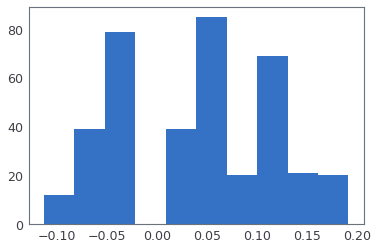

In [19]:
tc=0
plt.hist(ccc_galac[tc][:,2])

In [20]:
tc = 0

xxvvdd = xxvvdds[tc]
cc_galac,vv_galac = ccc_galac[tc],vvv_galac[tc]
dd = xxvvdd[:,-1]
cc = np.array([xv[:3:] for xv in xxvvdd])
vv = np.array([xv[3:6] for xv in xxvvdd])
xvLSR = xv_LSRs[tc+1]

#bb_bins = [(min(cc_galac[:,2]),-.2,"r"),(-.2,-.15,"b"),(-.15,0,"g"),(0,max(cc_galac[:,2]),"orange")]
bb_bins = [(min(cc_galac[:,2]),0,"red"),(0,.09,"blue"),(.09,max(cc_galac[:,2]),"green")]
#bb_bins = [(-.15,0,"g"),(0,np.pi/2,"orange")]
quivscale=2000
velscale=mt.C.kpc.express(mt.C.km)



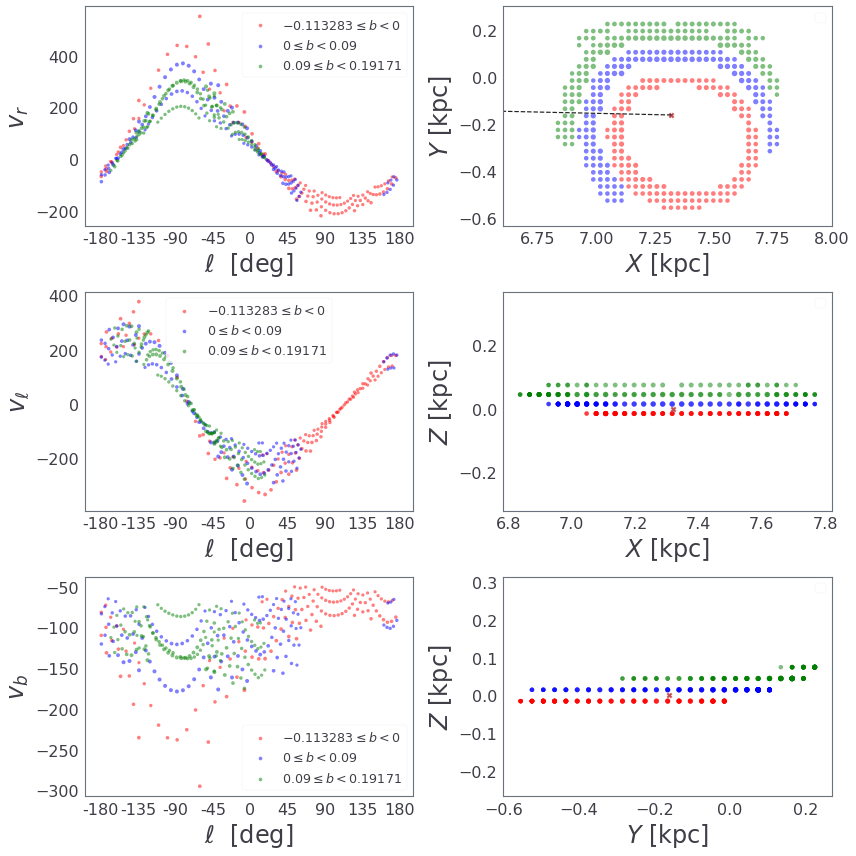

In [21]:
phase_space_bin(xxvvdd,cc_galac,vv_galac,dd,cc,vv,xvLSR,bb_bins,tc)

In [22]:
binnesd_ids12 = []
for bbin in bb_bins:
    bin_ids = np.array(subDFs[tc].id[(bbin[0]<=cc_galac[:,2])&(cc_galac[:,2]<=bbin[1])])
    binnesd_ids12.append(bin_ids)

In [23]:
MCMCfit12ttbin = np.load("MCMCfit12ttbin.npy")
MCMCfit12bin = MCMCfit12ttbin[0]

In [24]:
# MCMCfit12bin = [oc.MCMCfit_extd(xxvvdd[(cc_galac[:,2]>=bbin[0]) & (cc_galac[:,2]<=bbin[1])],xvLSR,Nsteps=5500) for bbin in bb_bins]

(<Figure size 576x864 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbeb1612990>,
       dtype=object))

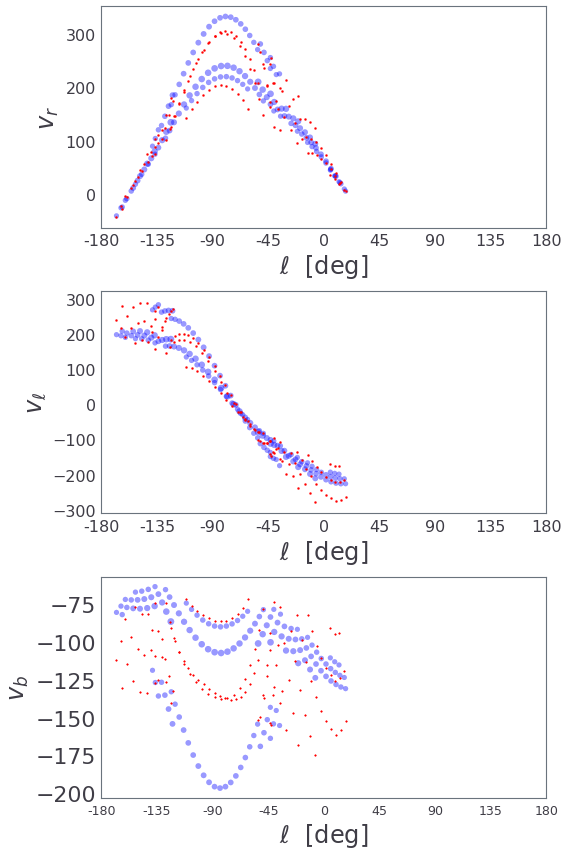

In [25]:
plot_fit(MCMCfit12bin[2])

In [26]:
# ivc = 0
# ll = np.linspace(-np.pi,np.pi,200)
# plt.figure(figsize=(16,8))
# for ibc in range(0,1):
#     MCMCrun=MCMCfit12bin[ibc]
#     med_model, spread_down, spread_up = bin_spread(MCMCrun,ivc)
#     plt.scatter(MCMCrun.cc_galac[:,1],MCMCrun.vv_galac[:,ivc]/MCMCrun.cc_galac[:,0],label='Change in T',s=MCMCrun.dd*10,alpha=.5,color=bb_bins[ibc][2])
#     plt.scatter(MCMCrun.cc_galac[:,1],np.array([[oc.vr_model_ext(c,MCMCrun.theta),oc.vell_model_ext(c,MCMCrun.theta),oc.vb_model_ext(c,MCMCrun.theta)]/c[0] for c in MCMCrun.cc_galac])[:,ivc],label='Highest Likelihood Model',s=20,color=bb_bins[ibc][2],marker="*" )
#     plt.fill_between(ll,spread_down,spread_up,color=bb_bins[ibc][2],alpha=0.3,label=r'$1\sigma$ Posterior Spread')
# plt.legend()

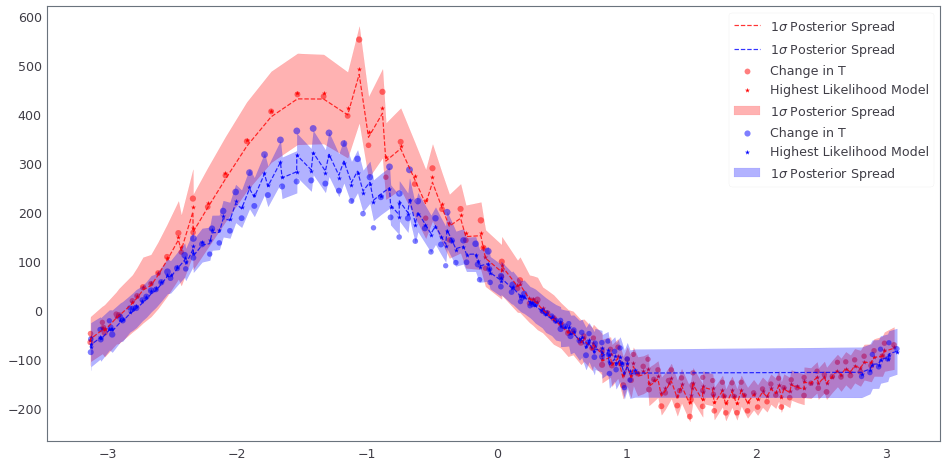

In [27]:
ivc = 0
ll = np.linspace(-np.pi,np.pi,200)
plt.figure(figsize=(16,8))
for ibc in range(0,2):
    MCMCrun=MCMCfit12bin[ibc]
    lsorted, med_model, spread = theta_spread(MCMCrun,ivc)
    plt.scatter(MCMCrun.cc_galac[:,1],MCMCrun.vv_galac[:,ivc]/MCMCrun.cc_galac[:,0],label='Change in T',s=MCMCrun.dd*10,alpha=.5,color=bb_bins[ibc][2])
    plt.scatter(MCMCrun.cc_galac[:,1],np.array([[oc.vr_model_ext(c,MCMCrun.theta),oc.vell_model_ext(c,MCMCrun.theta),oc.vb_model_ext(c,MCMCrun.theta)]/c[0] for c in MCMCrun.cc_galac])[:,ivc],label='Highest Likelihood Model',s=20,color=bb_bins[ibc][2],marker="*" )
    plt.fill_between(lsorted[:,1],med_model-spread,med_model+spread,color=bb_bins[ibc][2],alpha=0.3,label=r'$1\sigma$ Posterior Spread')
    plt.plot(lsorted[:,1],med_model,color=bb_bins[ibc][2],alpha=0.8,label=r'$1\sigma$ Posterior Spread',ls="--")
plt.legend()

In [28]:
for mc in MCMCfit12bin:
    print [np.round(voc,decimals=2) for voc in mc.theta]

[12.55, -9.29, -0.8, -0.68, -2060.85, -2033.52, 670.88, 675.02, 2061.64]
[15.82, -6.74, -1.05, -3.64, 2585.51, 2566.0, -908.1, -902.05, -2544.18]
[14.37, -16.06, 9.67, -13.01, 1018.78, 949.81, -390.94, -394.29, -1037.35]


___

(array([  5.,  13.,  39.,  45.,  80., 172., 415., 332., 212., 418.]),
 array([-0.36366176, -0.32100385, -0.27834593, -0.23568801, -0.1930301 ,
        -0.15037218, -0.10771426, -0.06505635, -0.02239843,  0.02025949,
         0.0629174 ]),
 <a list of 10 Patch objects>)

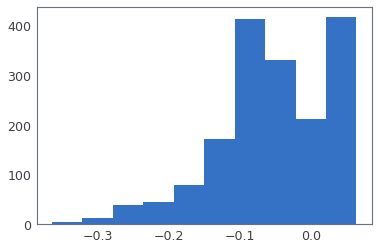

In [29]:
tc=1
plt.hist(ccc_galac[tc][:,2])

In [30]:
tc = 1

xxvvdd = xxvvdds[tc]
cc_galac,vv_galac = ccc_galac[tc],vvv_galac[tc]
dd = xxvvdd[:,-1]
cc = np.array([xv[:3:] for xv in xxvvdd])
vv = np.array([xv[3:6] for xv in xxvvdd])
xvLSR = xv_LSRs[tc+1]

#bb_bins = [(min(cc_galac[:,2]),-.2,"r"),(-.2,-.15,"b"),(-.15,0,"g"),(0,max(cc_galac[:,2]),"orange")]
bb_bins = [(min(cc_galac[:,2]),-.16,"red"),(-.16,-.03,"blue"),(-.03,0,"green"),(0,max(cc_galac[:,2]),"orange")]
#bb_bins = [(min(cc_galac[:,2]),max(cc_galac[:,2]),"orange")]
#bb_bins = [(-.15,0,"g"),(0,np.pi/2,"orange")]
quivscale=2000
velscale=mt.C.kpc.express(mt.C.km)



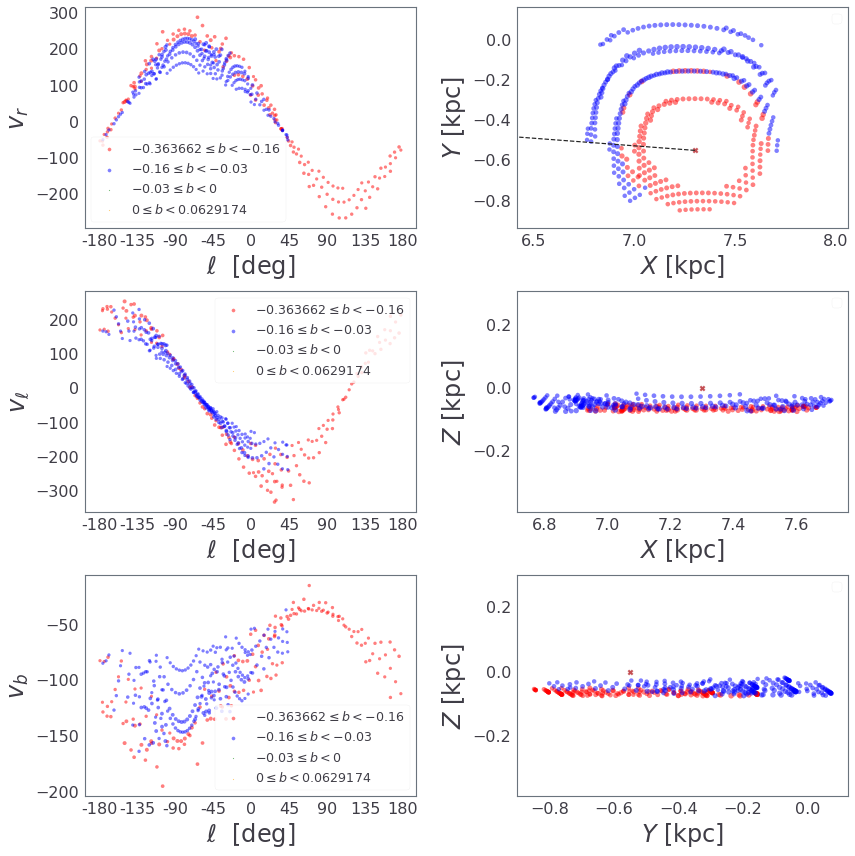

In [31]:
#auxbola = [idc in np.array(subDFs[tc-1].id) for idc in subDFs[tc].id]
auxbola = [(idc in binnesd_ids12[0]) | \
           (idc in binnesd_ids12[1]) | \
           (idc in binnesd_ids12[2]) for idc in subDFs[tc].id]
# auxbola = [(idc not in binnesd_ids12[0]) & \
#            (idc not in binnesd_ids12[1]) & \
#            (idc not in binnesd_ids12[2]) for idc in subDFs[tc].id]
phase_space_bin(xxvvdd[auxbola],\
                cc_galac[auxbola],\
                vv_galac[auxbola],\
                dd[auxbola],\
                cc[auxbola],\
                vv[auxbola],\
                xvLSR,bb_bins,tc)

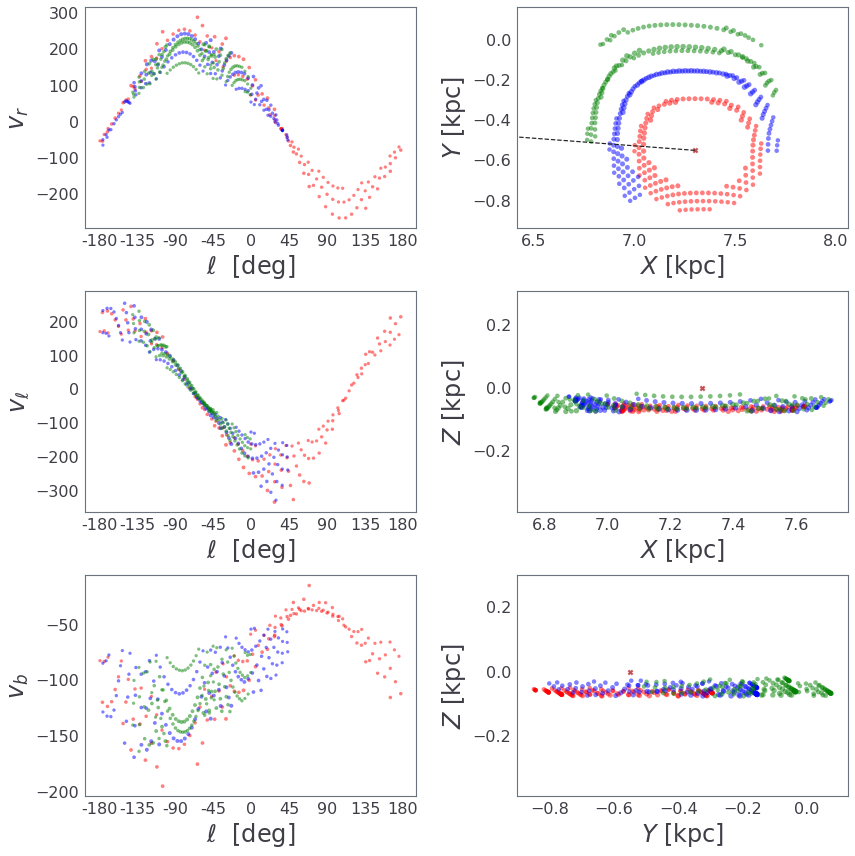

In [32]:
phase_space_binprev(xxvvdd[auxbola],\
                cc_galac[auxbola],\
                vv_galac[auxbola],\
                dd[auxbola],\
                cc[auxbola],\
                vv[auxbola],\
                xvLSR,binnesd_ids12,["red","blue","green"],np.array(subDFs[tc].id)[auxbola])

In [33]:
auxbolaa = [[(idc in bin_ids) for idc in subDFs[tc].id] for bin_ids in binnesd_ids12]

In [34]:
ls

axisim_whit_r-Copy1.ipynb             line-clustering from saves.ipynb
axisim_whit_r.ipynb                   line-clustering op13 All-Copy1.ipynb
cap4.ipynb                            line-clustering op13 All.ipynb
cloud_pass.ipynb                      maketar_from_curdir.ipynb
currdir.tar                           MCMCfit12bin.npy
data-MCMC.ipynb                       MCMCfit12ttbin.npy
data-szib-paper.txt                   MCMCfit13ttbin.npy
entendiendo-sim-circular.ipynb        MCMC_submuestras.ipynb
entendiendo-sim-vertical-Copy1.ipynb  porsi2.npy
entendiendo-sim-vertical.ipynb        porsi3.npy
entendiento-oortc.ipynb               porsi.npy
exp1.ipynb                            rut_oc_sim.ipynb
exp2.ipynb                            Untitled1.ipynb
exp3.ipynb                            Untitled2.ipynb
figs/                                 Untitled5.ipynb
gif/                                  Untitled.ipynb


In [35]:
MCMCfit12at13bin = MCMCfit12ttbin[1]

In [36]:
# MCMCfit12at13bin = [oc.MCMCfit_extd(xxvvdd[auxbol],xvLSR,Nsteps=5500) for auxbol in auxbolaa]

(<Figure size 576x864 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbeb08ddb90>,
       dtype=object))

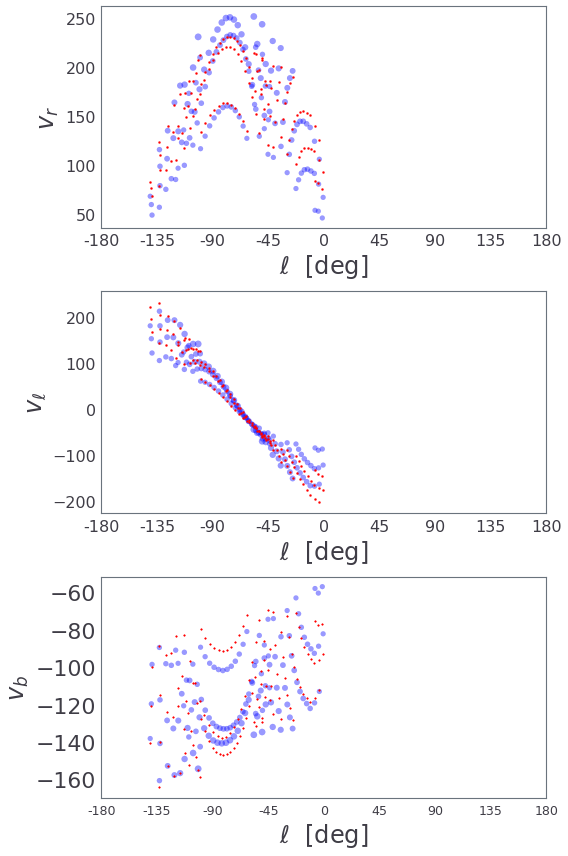

In [37]:
plot_fit(MCMCfit12at13bin[2])

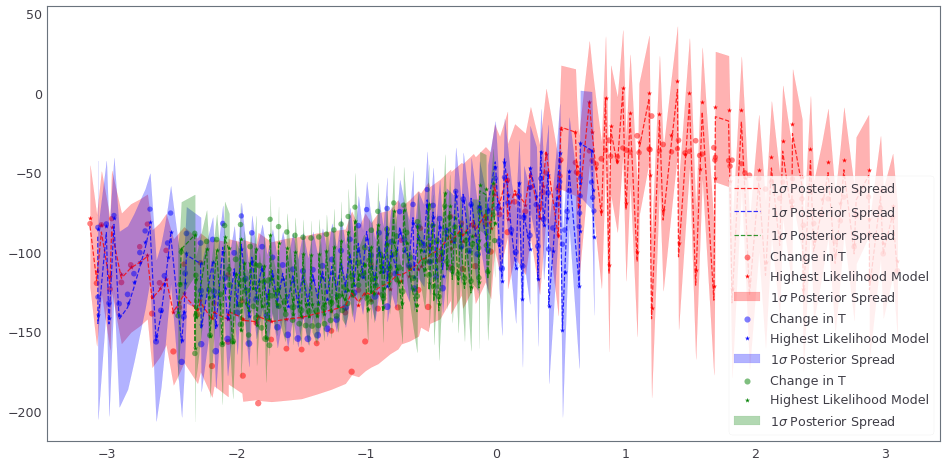

In [38]:
ivc = 2
ll = np.linspace(-np.pi,np.pi,200)
plt.figure(figsize=(16,8))
for ibc in range(0,3):
    MCMCrun=MCMCfit12at13bin[ibc]
    lsorted, med_model, spread = theta_spread(MCMCrun,ivc)
    plt.scatter(MCMCrun.cc_galac[:,1],MCMCrun.vv_galac[:,ivc]/MCMCrun.cc_galac[:,0],label='Change in T',s=MCMCrun.dd*10,alpha=.5,color=bb_bins[ibc][2])
    plt.scatter(MCMCrun.cc_galac[:,1],np.array([[oc.vr_model_ext(c,MCMCrun.theta),oc.vell_model_ext(c,MCMCrun.theta),oc.vb_model_ext(c,MCMCrun.theta)]/c[0] for c in MCMCrun.cc_galac])[:,ivc],label='Highest Likelihood Model',s=20,color=bb_bins[ibc][2],marker="*" )
    plt.fill_between(lsorted[:,1],med_model-spread,med_model+spread,color=bb_bins[ibc][2],alpha=0.3,label=r'$1\sigma$ Posterior Spread')
    plt.plot(lsorted[:,1],med_model,color=bb_bins[ibc][2],alpha=0.8,label=r'$1\sigma$ Posterior Spread',ls="--")
plt.legend()

___

(array([  4.,   4.,   4.,   9.,  13.,  46., 196., 457., 577., 421.]),
 array([-0.85536075, -0.77052381, -0.68568687, -0.60084994, -0.516013  ,
        -0.43117606, -0.34633913, -0.26150219, -0.17666525, -0.09182832,
        -0.00699138]),
 <a list of 10 Patch objects>)

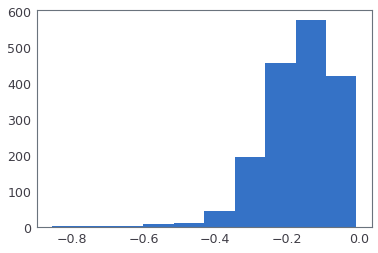

In [39]:
tc=2
plt.hist(ccc_galac[tc][:,2])

In [40]:
tc = 2

xxvvdd = xxvvdds[tc]
cc_galac,vv_galac = ccc_galac[tc],vvv_galac[tc]
dd = xxvvdd[:,-1]
cc = np.array([xv[:3:] for xv in xxvvdd])
vv = np.array([xv[3:6] for xv in xxvvdd])
xvLSR = xv_LSRs[tc+1]

#bb_bins = [(min(cc_galac[:,2]),-.2,"r"),(-.2,-.15,"b"),(-.15,0,"g"),(0,max(cc_galac[:,2]),"orange")]
bb_bins = [(min(cc_galac[:,2]),-.16,"red"),(-.16,-.03,"blue"),(-.03,0,"green"),(0,max(cc_galac[:,2]),"orange")]
#bb_bins = [(min(cc_galac[:,2]),max(cc_galac[:,2]),"orange")]
#bb_bins = [(-.15,0,"g"),(0,np.pi/2,"orange")]
quivscale=2000
velscale=mt.C.kpc.express(mt.C.km)



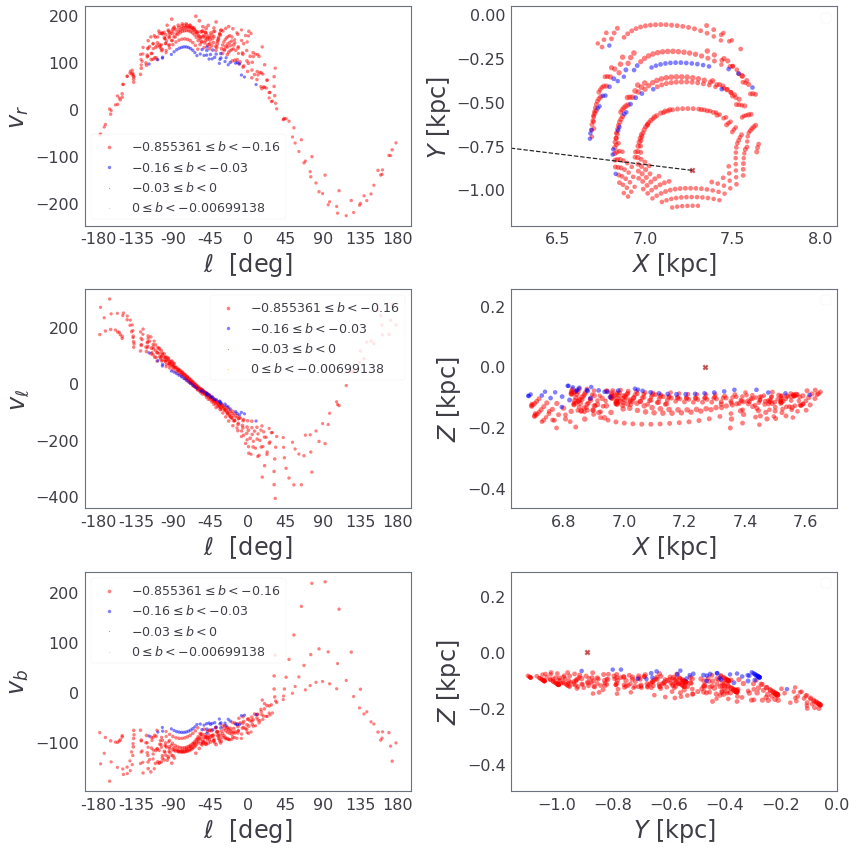

In [41]:
#auxbola = [idc in np.array(subDFs[tc-1].id) for idc in subDFs[tc].id]
auxbola = [(idc in binnesd_ids12[0]) | \
           (idc in binnesd_ids12[1]) | \
           (idc in binnesd_ids12[2]) for idc in subDFs[tc].id]
# auxbola = [(idc not in binnesd_ids12[0]) & \
#            (idc not in binnesd_ids12[1]) & \
#            (idc not in binnesd_ids12[2]) for idc in subDFs[tc].id]
phase_space_bin(xxvvdd[auxbola],\
                cc_galac[auxbola],\
                vv_galac[auxbola],\
                dd[auxbola],\
                cc[auxbola],\
                vv[auxbola],\
                xvLSR,bb_bins,tc)

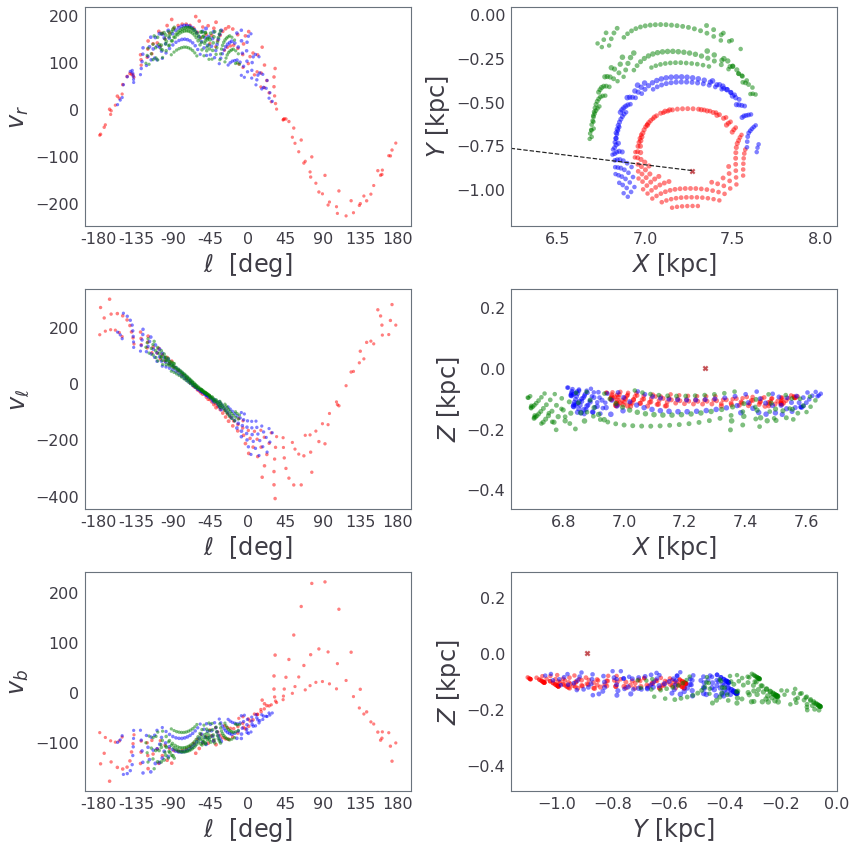

In [42]:
phase_space_binprev(xxvvdd[auxbola],\
                cc_galac[auxbola],\
                vv_galac[auxbola],\
                dd[auxbola],\
                cc[auxbola],\
                vv[auxbola],\
                xvLSR,binnesd_ids12,["red","blue","green"],np.array(subDFs[tc].id)[auxbola])

In [43]:
auxbolaa = [[(idc in bin_ids) for idc in subDFs[tc].id] for bin_ids in binnesd_ids12]

In [44]:
MCMCfit12at14bin = [oc.MCMCfit_extd(xxvvdd[auxbol],xvLSR,Nsteps=5500) for auxbol in auxbolaa]

100%|██████████| 5500/5500 [06:35<00:00, 13.90it/s]


[A,B,C,K,D,D',E,E',K']: [10.558432439697247, -21.270553422062104, -3.5634644729564875, 3.325723165193893, -305.44140684546244, -166.05194169590848, 155.63688072848845, 135.0672805315367, 155.45248364130984]


100%|██████████| 5500/5500 [06:17<00:00, 14.56it/s]


[A,B,C,K,D,D',E,E',K']: [9.205548223984001, -20.270197276763973, 2.0153770246402987, -9.891261717024694, -329.1198076026117, -281.02786526212634, 182.76498679650376, 190.92222927672861, 413.13594806444655]


100%|██████████| 5500/5500 [06:39<00:00, 11.99it/s]


[A,B,C,K,D,D',E,E',K']: [-7.433379567492435, -10.34847601845423, -19.443129809246695, 16.000554451931613, -241.99172966071015, -217.73356802902126, 151.15665831411923, 165.03799018813467, 577.7298123854513]


(<Figure size 576x864 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc832ff0490>,
       dtype=object))

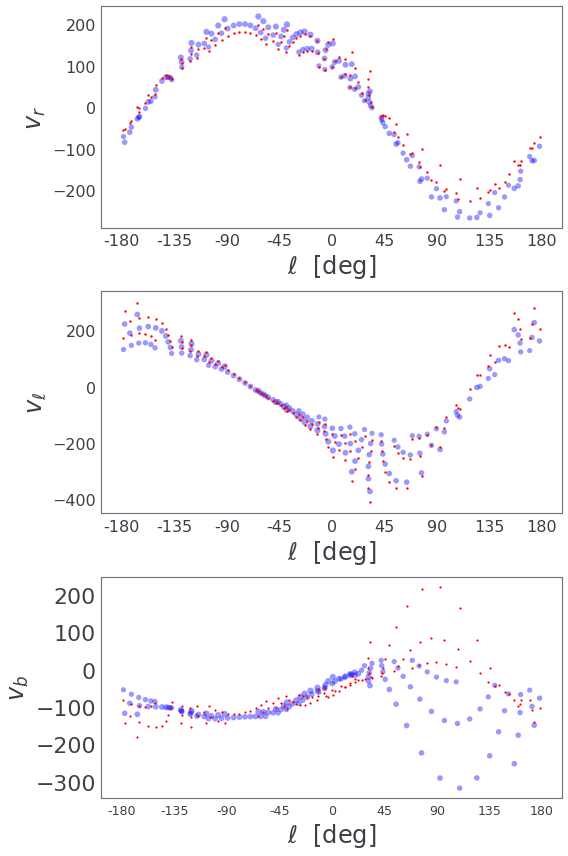

In [335]:
plot_fit(MCMCfit12at14bin[0])

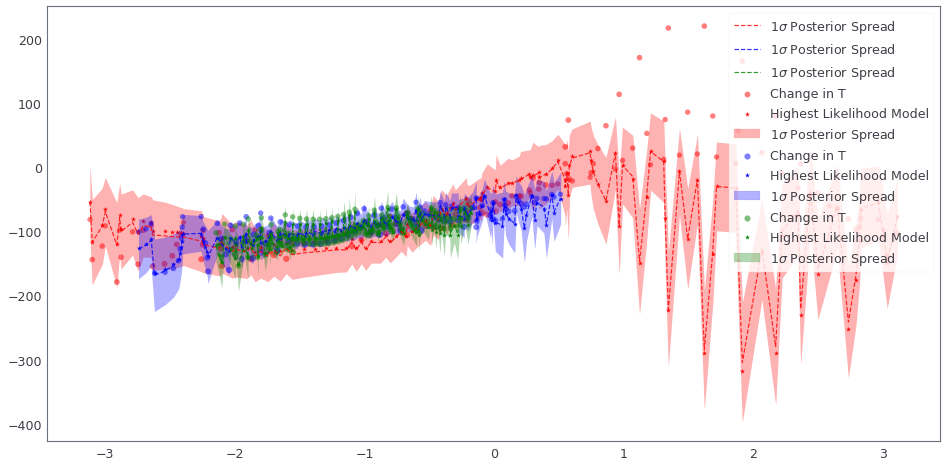

In [334]:
ivc = 2
ll = np.linspace(-np.pi,np.pi,200)
plt.figure(figsize=(16,8))
for ibc in range(0,3):
    MCMCrun=MCMCfit12at14bin[ibc]
    lsorted, med_model, spread = theta_spread(MCMCrun,ivc)
    plt.scatter(MCMCrun.cc_galac[:,1],MCMCrun.vv_galac[:,ivc]/MCMCrun.cc_galac[:,0],label='Change in T',s=MCMCrun.dd*10,alpha=.5,color=bb_bins[ibc][2])
    plt.scatter(MCMCrun.cc_galac[:,1],np.array([[oc.vr_model_ext(c,MCMCrun.theta),oc.vell_model_ext(c,MCMCrun.theta),oc.vb_model_ext(c,MCMCrun.theta)]/c[0] for c in MCMCrun.cc_galac])[:,ivc],label='Highest Likelihood Model',s=20,color=bb_bins[ibc][2],marker="*" )
    plt.fill_between(lsorted[:,1],med_model-spread,med_model+spread,color=bb_bins[ibc][2],alpha=0.3,label=r'$1\sigma$ Posterior Spread')
    plt.plot(lsorted[:,1],med_model,color=bb_bins[ibc][2],alpha=0.8,label=r'$1\sigma$ Posterior Spread',ls="--")
plt.legend()

In [45]:
np.save("MCMCfit12ttbin",[MCMCfit12bin,MCMCfit12at13bin,MCMCfit12at14bin])

____

In [29]:
tc = 1

xxvvdd = xxvvdds[tc]
cc_galac,vv_galac = ccc_galac[tc],vvv_galac[tc]
dd = xxvvdd[:,-1]
cc = np.array([xv[:3:] for xv in xxvvdd])
vv = np.array([xv[3:6] for xv in xxvvdd])
xvLSR = xv_LSRs[tc+1]

#bb_bins = [(min(cc_galac[:,2]),-.2,"r"),(-.2,-.15,"b"),(-.15,0,"g"),(0,max(cc_galac[:,2]),"orange")]
#bb_bins = [(min(cc_galac[:,2]),max(cc_galac[:,2]),"orange")]
#bb_bins = [(-.15,0,"g"),(0,np.pi/2,"orange")]
quivscale=2000
velscale=mt.C.kpc.express(mt.C.km)



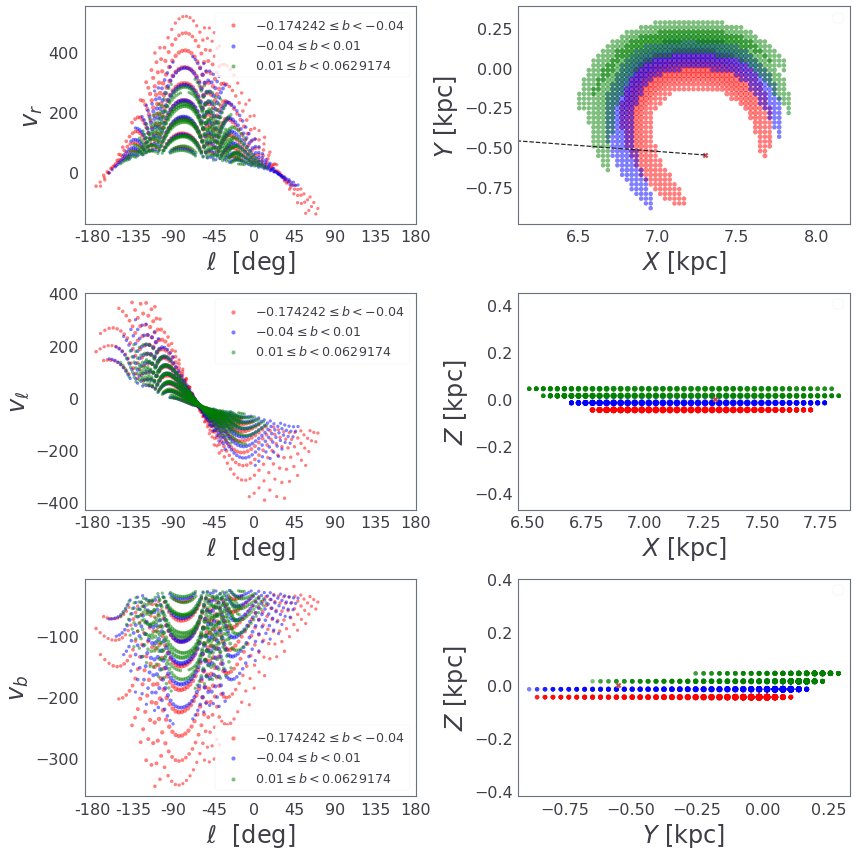

In [30]:
#auxbola = [idc in np.array(subDFs[tc-1].id) for idc in subDFs[tc].id]
# auxbola = [(idc in binnesd_ids12[0]) | \
#            (idc in binnesd_ids12[1]) | \
#            (idc in binnesd_ids12[2]) for idc in subDFs[tc].id]
auxbola = [(idc not in binnesd_ids12[0]) & \
           (idc not in binnesd_ids12[1]) & \
           (idc not in binnesd_ids12[2]) for idc in subDFs[tc].id]

bb_bins = [(min(cc_galac[auxbola][:,2]),-.04,"red"),(-.04,.01,"blue"),(.01,max(cc_galac[:,2]),"green")]

phase_space_bin(xxvvdd[auxbola],\
                cc_galac[auxbola],\
                vv_galac[auxbola],\
                dd[auxbola],\
                cc[auxbola],\
                vv[auxbola],\
                xvLSR,bb_bins,tc)

In [31]:
binnesd_ids13 = []
for bbin in bb_bins:
    bin_ids = np.array(subDFs[tc].id[(bbin[0]<=cc_galac[:,2])&(cc_galac[:,2]<=bbin[1])])
    binnesd_ids13.append(bin_ids)

In [32]:
MCMCfit13bin = [oc.MCMCfit_extd(xxvvdd[auxbola][(cc_galac[auxbola][:,2]>=bbin[0]) & (cc_galac[auxbola][:,2]<=bbin[1])],xvLSR,Nsteps=5500) for bbin in bb_bins]

100%|██████████| 6848/6848 [23:48<00:00,  4.85it/s]


[A,B,C,K,D,D',E,E',K']: [-5.778201894149477, 6.648142170623913, -33.86703146011178, 29.389696982562953, -1025.995354522515, -945.783815775556, 428.6467849423438, 430.52592665572547, 1123.836777479993]


100%|██████████| 5500/5500 [16:54<00:00,  5.49it/s]


[A,B,C,K,D,D',E,E',K']: [-6.258678336571053, 7.590745441414869, -31.701014273630932, 29.78635210198327, -2778.4984370963825, -2721.967205329389, 1124.62907072624, 1124.0805927138365, 2868.896108342411]


100%|██████████| 5500/5500 [21:54<00:00,  4.09it/s]


[A,B,C,K,D,D',E,E',K']: [-46.127485833273305, 5.0724404922242785, -72.18263843038817, 87.51998517897908, 40.04048805464041, 133.97482217182508, -38.12870470982583, -66.11793480481917, 103.78042379938643]


(<Figure size 576x864 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f84292690>,
       dtype=object))

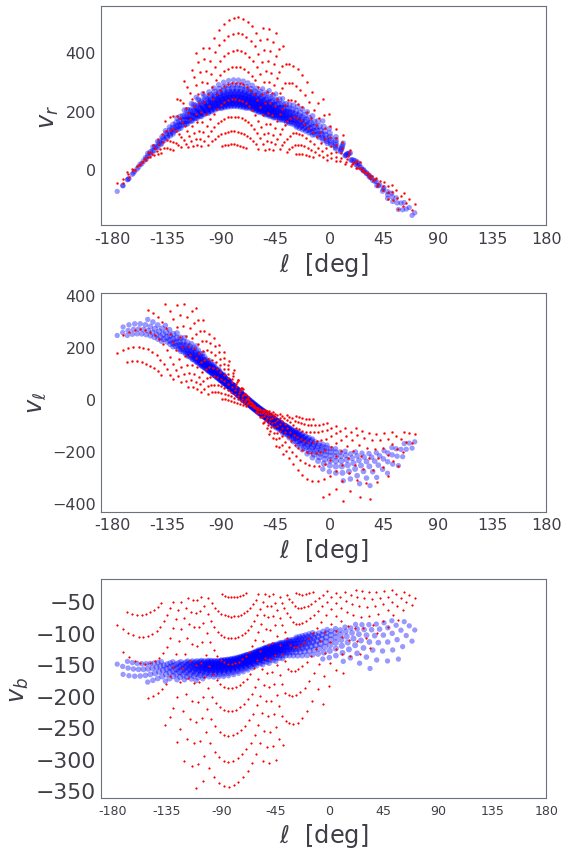

In [39]:
plot_fit(MCMCfit13bin[0])

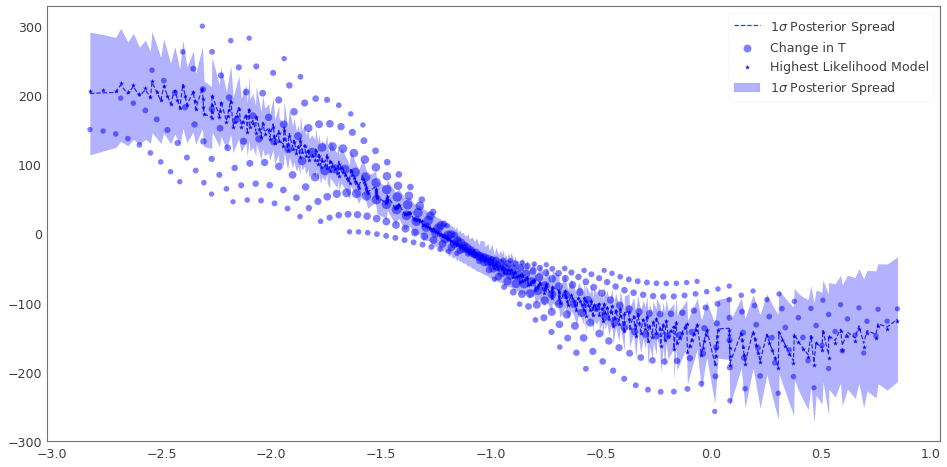

In [40]:
ivc = 1
ll = np.linspace(-np.pi,np.pi,200)
plt.figure(figsize=(16,8))
for ibc in range(1,2):
    MCMCrun=MCMCfit13bin[ibc]
    lsorted, med_model, spread = theta_spread(MCMCrun,ivc)
    plt.scatter(MCMCrun.cc_galac[:,1],MCMCrun.vv_galac[:,ivc]/MCMCrun.cc_galac[:,0],label='Change in T',s=MCMCrun.dd*10,alpha=.5,color=bb_bins[ibc][2])
    plt.scatter(MCMCrun.cc_galac[:,1],np.array([[oc.vr_model_ext(c,MCMCrun.theta),oc.vell_model_ext(c,MCMCrun.theta),oc.vb_model_ext(c,MCMCrun.theta)]/c[0] for c in MCMCrun.cc_galac])[:,ivc],label='Highest Likelihood Model',s=20,color=bb_bins[ibc][2],marker="*" )
    plt.fill_between(lsorted[:,1],med_model-spread,med_model+spread,color=bb_bins[ibc][2],alpha=0.3,label=r'$1\sigma$ Posterior Spread')
    plt.plot(lsorted[:,1],med_model,color=bb_bins[ibc][2],alpha=0.8,label=r'$1\sigma$ Posterior Spread',ls="--")
plt.legend()

_____

In [33]:
tc = 2

xxvvdd = xxvvdds[tc]
cc_galac,vv_galac = ccc_galac[tc],vvv_galac[tc]
dd = xxvvdd[:,-1]
cc = np.array([xv[:3:] for xv in xxvvdd])
vv = np.array([xv[3:6] for xv in xxvvdd])
xvLSR = xv_LSRs[tc+1]

#bb_bins = [(min(cc_galac[:,2]),-.2,"r"),(-.2,-.15,"b"),(-.15,0,"g"),(0,max(cc_galac[:,2]),"orange")]
bb_bins = [(min(cc_galac[:,2]),-.16,"red"),(-.16,-.03,"blue"),(-.03,0,"green"),(0,max(cc_galac[:,2]),"orange")]
#bb_bins = [(min(cc_galac[:,2]),max(cc_galac[:,2]),"orange")]
#bb_bins = [(-.15,0,"g"),(0,np.pi/2,"orange")]
quivscale=2000
velscale=mt.C.kpc.express(mt.C.km)



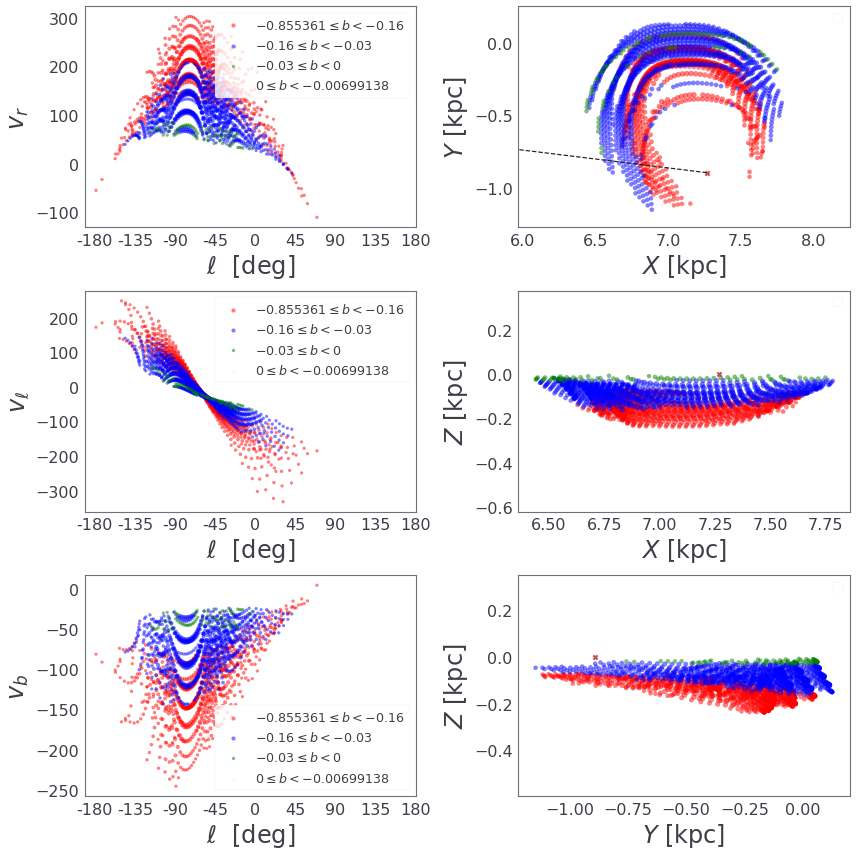

In [34]:
#auxbola = [idc in np.array(subDFs[tc-1].id) for idc in subDFs[tc].id]
auxbola = [(idc in binnesd_ids13[0]) | \
           (idc in binnesd_ids13[1]) | \
           (idc in binnesd_ids13[2]) for idc in subDFs[tc].id]
# auxbola = [(idc not in binnesd_ids12[0]) & \
#            (idc not in binnesd_ids12[1]) & \
#            (idc not in binnesd_ids12[2]) for idc in subDFs[tc].id]
phase_space_bin(xxvvdd[auxbola],\
                cc_galac[auxbola],\
                vv_galac[auxbola],\
                dd[auxbola],\
                cc[auxbola],\
                vv[auxbola],\
                xvLSR,bb_bins,tc)

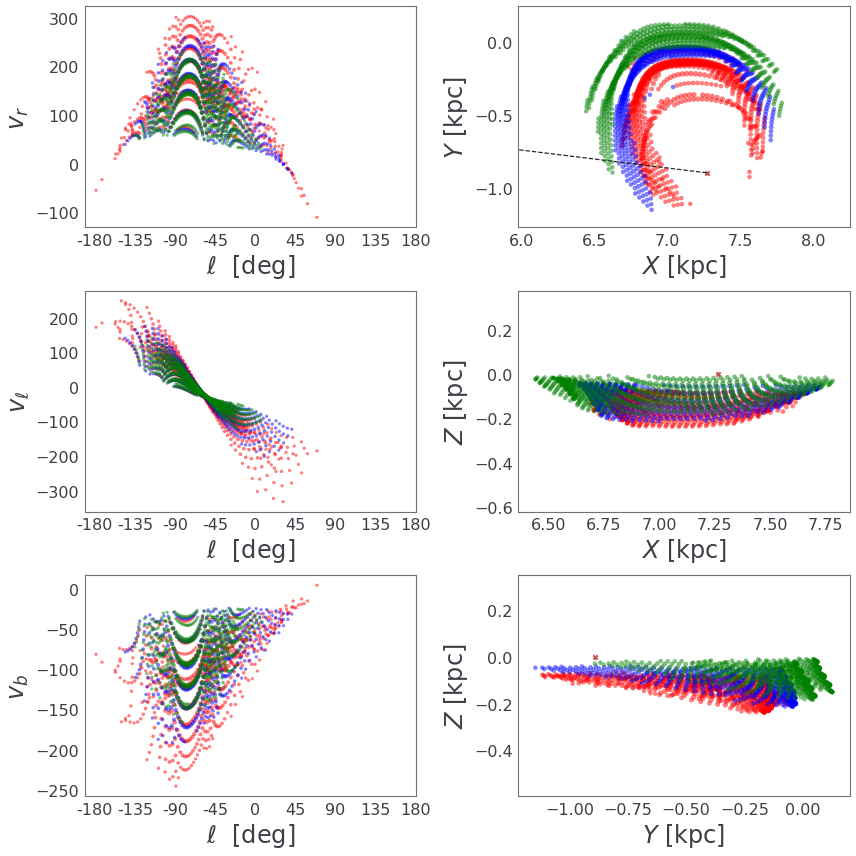

In [35]:
phase_space_binprev(xxvvdd[auxbola],\
                cc_galac[auxbola],\
                vv_galac[auxbola],\
                dd[auxbola],\
                cc[auxbola],\
                vv[auxbola],\
                xvLSR,binnesd_ids13,["red","blue","green"],np.array(subDFs[tc].id)[auxbola])

In [36]:
auxbolaa = [[(idc in bin_ids) for idc in subDFs[tc].id] for bin_ids in binnesd_ids13]

In [37]:
MCMCfit13at14bin = [oc.MCMCfit_extd(xxvvdd[auxbol],xvLSR,Nsteps=5500) for auxbol in auxbolaa]

100%|██████████| 6316/6316 [28:15<00:00,  3.53it/s]


[A,B,C,K,D,D',E,E',K']: [8.784332167668587, -15.059287351767596, -6.305141865557818, -7.593602420371676, -336.7473419142523, -335.90717649162974, 193.74855084642158, 226.514356780097, 777.4067291441812]


100%|██████████| 5500/5500 [16:33<00:00,  4.86it/s]


[A,B,C,K,D,D',E,E',K']: [8.37971084465681, -17.73586845136245, -7.717252507191066, -0.35596755274659253, -396.83397927453075, -415.7227505969332, 251.3140414448095, 280.5017224295728, 1010.1378057580342]


100%|██████████| 5500/5500 [21:45<00:00,  4.02it/s]


[A,B,C,K,D,D',E,E',K']: [-13.352765481858103, -9.023062681274984, -26.02408660342411, 33.23971613386128, -346.20219130131875, -323.47982489635575, 229.6578791608497, 229.6482201222376, 875.9160034595407]


(<Figure size 576x864 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fa67a1bd0>,
       dtype=object))

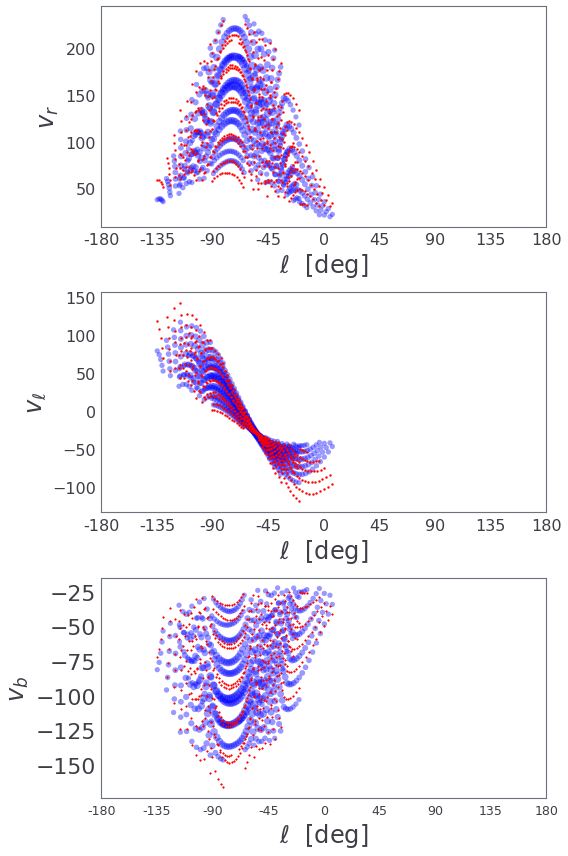

In [46]:
plot_fit(MCMCfit13at14bin[2])

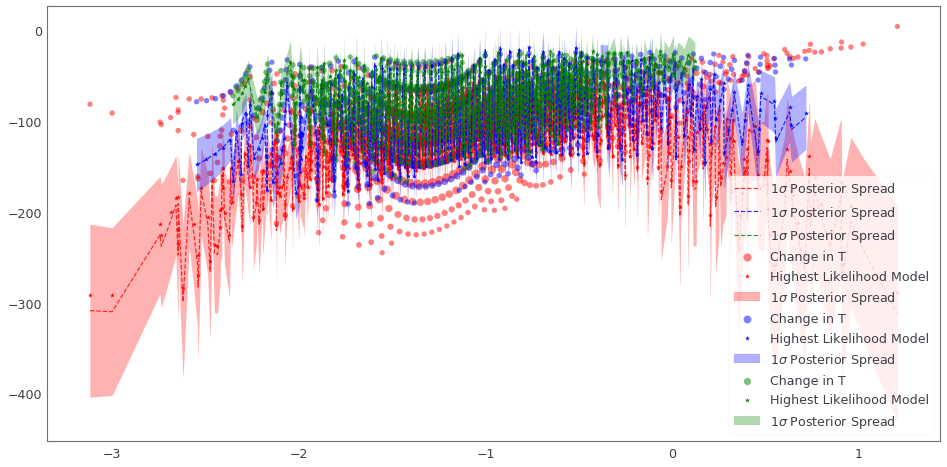

In [45]:
ivc = 2
ll = np.linspace(-np.pi,np.pi,200)
plt.figure(figsize=(16,8))
for ibc in range(0,3):
    MCMCrun=MCMCfit13at14bin[ibc]
    lsorted, med_model, spread = theta_spread(MCMCrun,ivc)
    plt.scatter(MCMCrun.cc_galac[:,1],MCMCrun.vv_galac[:,ivc]/MCMCrun.cc_galac[:,0],label='Change in T',s=MCMCrun.dd*10,alpha=.5,color=bb_bins[ibc][2])
    plt.scatter(MCMCrun.cc_galac[:,1],np.array([[oc.vr_model_ext(c,MCMCrun.theta),oc.vell_model_ext(c,MCMCrun.theta),oc.vb_model_ext(c,MCMCrun.theta)]/c[0] for c in MCMCrun.cc_galac])[:,ivc],label='Highest Likelihood Model',s=20,color=bb_bins[ibc][2],marker="*" )
    plt.fill_between(lsorted[:,1],med_model-spread,med_model+spread,color=bb_bins[ibc][2],alpha=0.3,label=r'$1\sigma$ Posterior Spread')
    plt.plot(lsorted[:,1],med_model,color=bb_bins[ibc][2],alpha=0.8,label=r'$1\sigma$ Posterior Spread',ls="--")
plt.legend()

In [38]:
np.save("MCMCfit13ttbin",[MCMCfit13bin,MCMCfit13at14bin])

_____

In [48]:
tc = 2

xxvvdd = xxvvdds[tc]
cc_galac,vv_galac = ccc_galac[tc],vvv_galac[tc]
dd = xxvvdd[:,-1]
cc = np.array([xv[:3:] for xv in xxvvdd])
vv = np.array([xv[3:6] for xv in xxvvdd])
xvLSR = xv_LSRs[tc+1]

#bb_bins = [(min(cc_galac[:,2]),-.2,"r"),(-.2,-.15,"b"),(-.15,0,"g"),(0,max(cc_galac[:,2]),"orange")]
bb_bins = [(min(cc_galac[:,2]),-.16,"red"),(-.16,-.03,"blue"),(-.03,0,"green"),(0,max(cc_galac[:,2]),"orange")]
#bb_bins = [(min(cc_galac[:,2]),max(cc_galac[:,2]),"orange")]
#bb_bins = [(-.15,0,"g"),(0,np.pi/2,"orange")]
quivscale=2000
velscale=mt.C.kpc.express(mt.C.km)



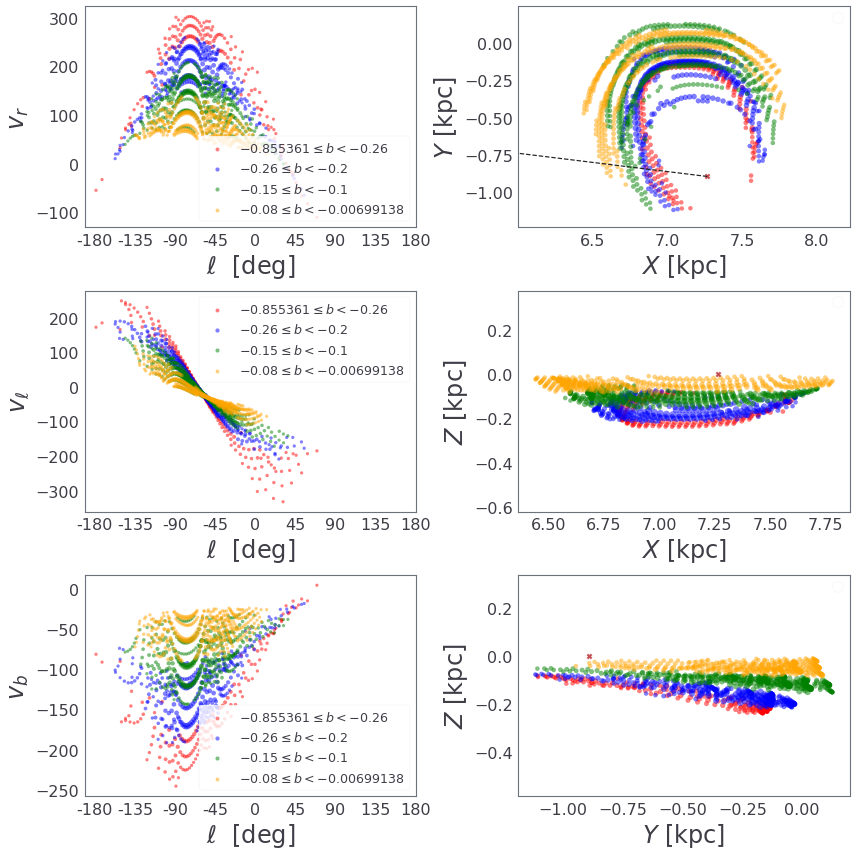

In [70]:
#auxbola = [idc in np.array(subDFs[tc-1].id) for idc in subDFs[tc].id]
auxbola = [(idc in binnesd_ids13[0]) | \
           (idc in binnesd_ids13[1]) | \
           (idc in binnesd_ids13[2]) for idc in subDFs[tc].id]
# auxbola = [(idc not in binnesd_ids12[0]) & \
#            (idc not in binnesd_ids12[1]) & \
#            (idc not in binnesd_ids12[2]) for idc in subDFs[tc].id]
bb_bins = [(min(cc_galac[:,2]),-.26,"red"),(-.26,-.2,"blue"),(-.15,-.1,"green"),(-.08,max(cc_galac[:,2]),"orange")]
phase_space_bin(xxvvdd[auxbola],\
                cc_galac[auxbola],\
                vv_galac[auxbola],\
                dd[auxbola],\
                cc[auxbola],\
                vv[auxbola],\
                xvLSR,bb_bins,tc)

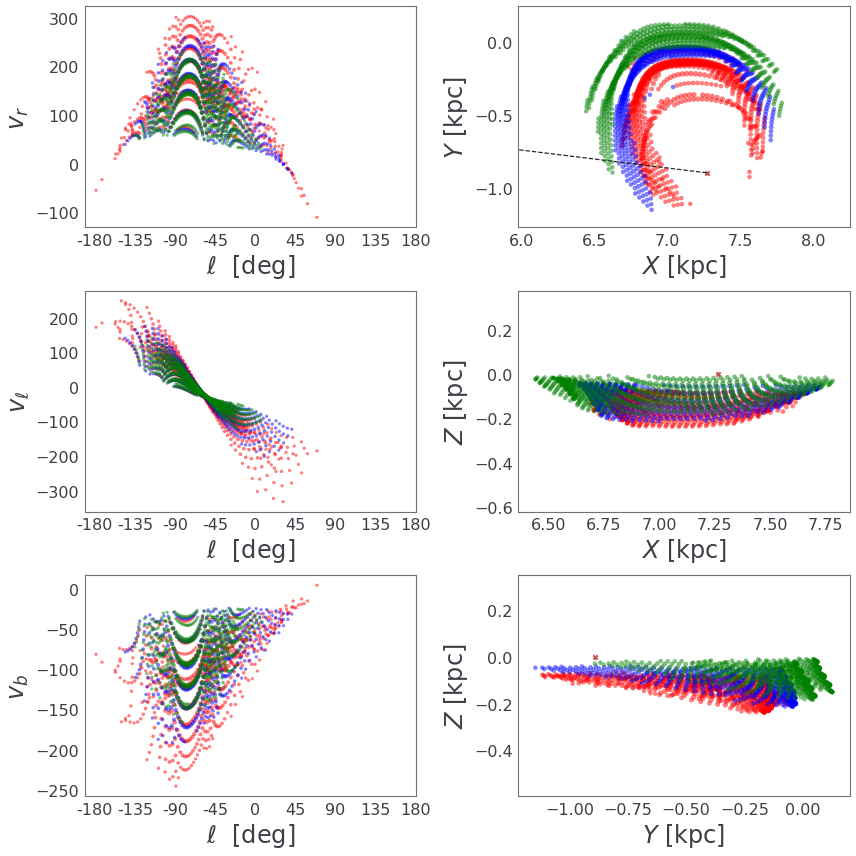

In [35]:
phase_space_binprev(xxvvdd[auxbola],\
                cc_galac[auxbola],\
                vv_galac[auxbola],\
                dd[auxbola],\
                cc[auxbola],\
                vv[auxbola],\
                xvLSR,binnesd_ids13,["red","blue","green"],np.array(subDFs[tc].id)[auxbola])

In [36]:
auxbolaa = [[(idc in bin_ids) for idc in subDFs[tc].id] for bin_ids in binnesd_ids13]

In [37]:
MCMCfit13at14bin = [oc.MCMCfit_extd(xxvvdd[auxbol],xvLSR,Nsteps=5500) for auxbol in auxbolaa]

100%|██████████| 6316/6316 [28:15<00:00,  3.53it/s]


[A,B,C,K,D,D',E,E',K']: [8.784332167668587, -15.059287351767596, -6.305141865557818, -7.593602420371676, -336.7473419142523, -335.90717649162974, 193.74855084642158, 226.514356780097, 777.4067291441812]


100%|██████████| 5500/5500 [16:33<00:00,  4.86it/s]


[A,B,C,K,D,D',E,E',K']: [8.37971084465681, -17.73586845136245, -7.717252507191066, -0.35596755274659253, -396.83397927453075, -415.7227505969332, 251.3140414448095, 280.5017224295728, 1010.1378057580342]


100%|██████████| 5500/5500 [21:45<00:00,  4.02it/s]


[A,B,C,K,D,D',E,E',K']: [-13.352765481858103, -9.023062681274984, -26.02408660342411, 33.23971613386128, -346.20219130131875, -323.47982489635575, 229.6578791608497, 229.6482201222376, 875.9160034595407]


(<Figure size 576x864 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fa67a1bd0>,
       dtype=object))

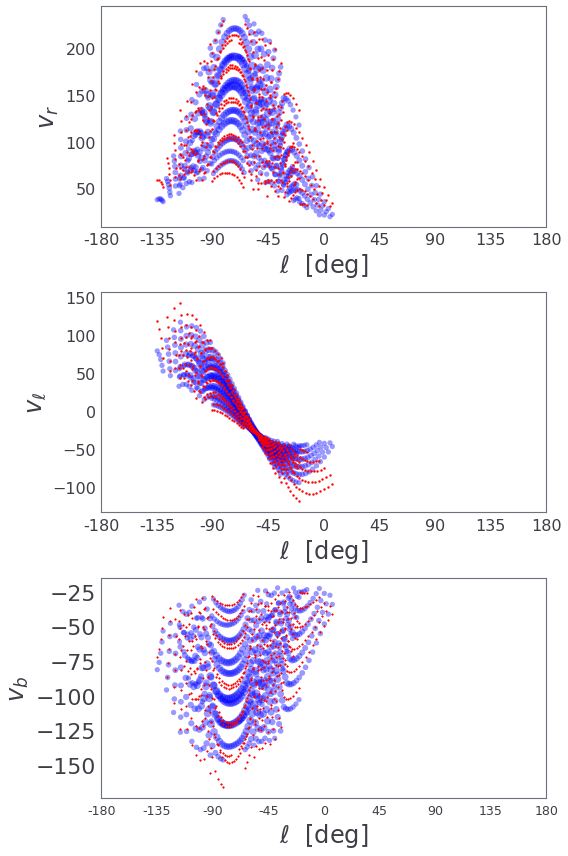

In [46]:
plot_fit(MCMCfit13at14bin[2])

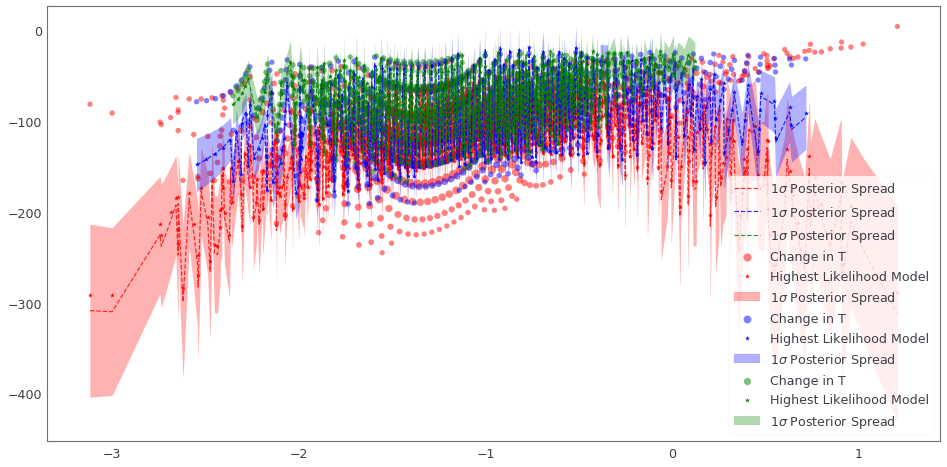

In [45]:
ivc = 2
ll = np.linspace(-np.pi,np.pi,200)
plt.figure(figsize=(16,8))
for ibc in range(0,3):
    MCMCrun=MCMCfit13at14bin[ibc]
    lsorted, med_model, spread = theta_spread(MCMCrun,ivc)
    plt.scatter(MCMCrun.cc_galac[:,1],MCMCrun.vv_galac[:,ivc]/MCMCrun.cc_galac[:,0],label='Change in T',s=MCMCrun.dd*10,alpha=.5,color=bb_bins[ibc][2])
    plt.scatter(MCMCrun.cc_galac[:,1],np.array([[oc.vr_model_ext(c,MCMCrun.theta),oc.vell_model_ext(c,MCMCrun.theta),oc.vb_model_ext(c,MCMCrun.theta)]/c[0] for c in MCMCrun.cc_galac])[:,ivc],label='Highest Likelihood Model',s=20,color=bb_bins[ibc][2],marker="*" )
    plt.fill_between(lsorted[:,1],med_model-spread,med_model+spread,color=bb_bins[ibc][2],alpha=0.3,label=r'$1\sigma$ Posterior Spread')
    plt.plot(lsorted[:,1],med_model,color=bb_bins[ibc][2],alpha=0.8,label=r'$1\sigma$ Posterior Spread',ls="--")
plt.legend()

In [38]:
np.save("MCMCfit13ttbin",[MCMCfit13bin,MCMCfit13at14bin])